# Imports

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib widget

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Disable jedi autocompleter
%config Completer.use_jedi = False


# DATA

In [3]:
path="./Data/data.csv"
df=pandas.read_csv(path)

In [4]:
df.head(20)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0           1                                           0.370594          
1           1                                           0.464291          
2           1                                           0.426071          
3           1                                           0.399844          
4           1                                           0.465022          
5           1                                           0.388680          
6           0                                           0.390923          
7           0                                           0.508361          
8           0                                           0.488519          
9           0                                           0.495686          
10          0                                           0.482475          
11          0                                           0.444401          
12          0                                           0.491152          
13          0                                           0.474041          
14          0                                           0.506703          
15          0                                           0.513821          
16          0                                           0.488909          
17          0                                           0.535953          
18          0                                           0.504071          
19          0                                           0.487398          

     ROA(A) before interest and % after tax  \
0                                  0.424389   
1                                  0.538214   
2                                  0.499019   
3                                  0.451265   
4                                  0.538432   
5                                  0.415177   
6                                  0.445704   
7                                  0.570922   
8                                  0.545137   
9                                  0.550916   
10                                 0.567543   
11                                 0.549717   
12                                 0.551570   
13                                 0.533308   
14                                 0.575829   
15                                 0.571086   
16                                 0.560238   
17                                 0.590438   
18                                 0.559802   
19                                 0.543720   

     ROA(B) before interest and depreciation after tax  \
0                                            0.405750    
1                                            0.516730    
2                                            0.472295    
3                                            0.457733    
4                                            0.522298    
5                                            0.419134    
6                                            0.436158    
7                                            0.559077    
8                                            0.543284    
9                                            0.542963    
10                                           0.538198    
11                                           0.498956    
12                                           0.543391    
13                                           0.523690    
14                                           0.569838    
15                                           0.558756    
16                                           0.540286    
17                                           0.580920    
18                                           0.558649    
19                                           0.533647    

     Operating Gross Margin   Realized Sales Gross Margin  \
0                  0.601457                      0.601457   
1                  0.610235                      0.610235   
2                  0.601450           

In [5]:
df.shape

(6819, 96)

In [6]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
#Target
Y=df['Bankrupt?']
print(Y.value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [8]:
#INPUT
X=df.drop('Bankrupt?',axis=1)
print(X.shape)
X.head()

(6819, 95)


ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2         

# Model Training

## Logistic Regression

### Train-Test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42
                                            )

In [11]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(4568, 95) (2251, 95) (4568,) (2251,)


In [12]:
Y_test.value_counts()

0    2170
1      81
dtype: int64

### Model training

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model=LogisticRegression(max_iter=10000,random_state=42)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [15]:
predict=model.predict(X_test)
print(predict.shape)


(2251,)


### Performance metric

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
print(classification_report(predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2236
           1       0.01      0.07      0.02        15

    accuracy                           0.96      2251
   macro avg       0.50      0.52      0.50      2251
weighted avg       0.99      0.96      0.97      2251



In [18]:
conf_matrix=confusion_matrix(y_true=Y_test,y_pred=predict)
print(conf_matrix)

[[2156   14]
 [  80    1]]


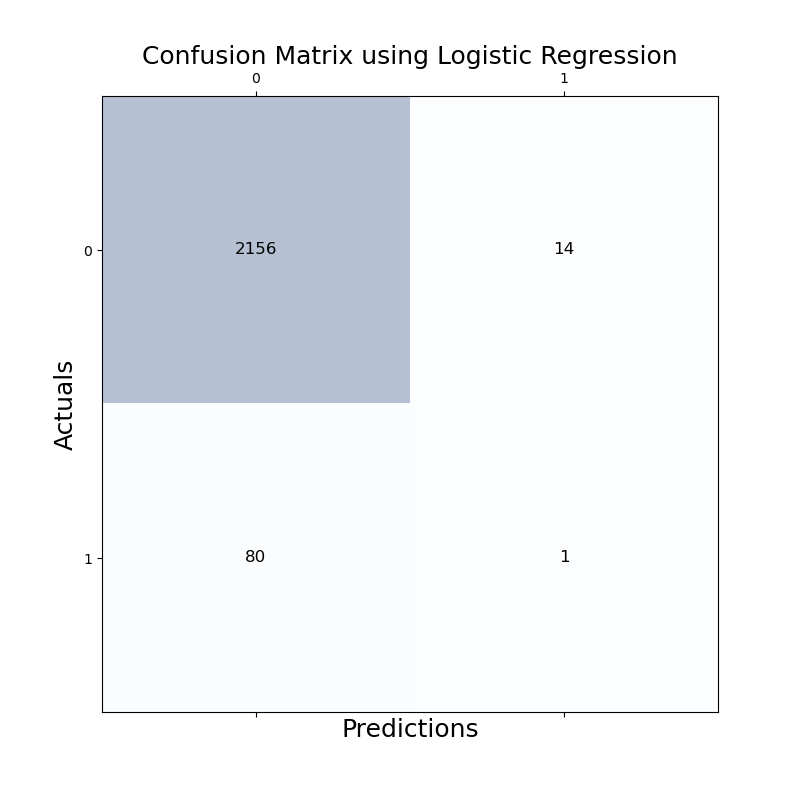

In [19]:
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Blues,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

In [20]:
model.coef_.shape

(1, 95)

# Visualizing Features

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [22]:
X.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

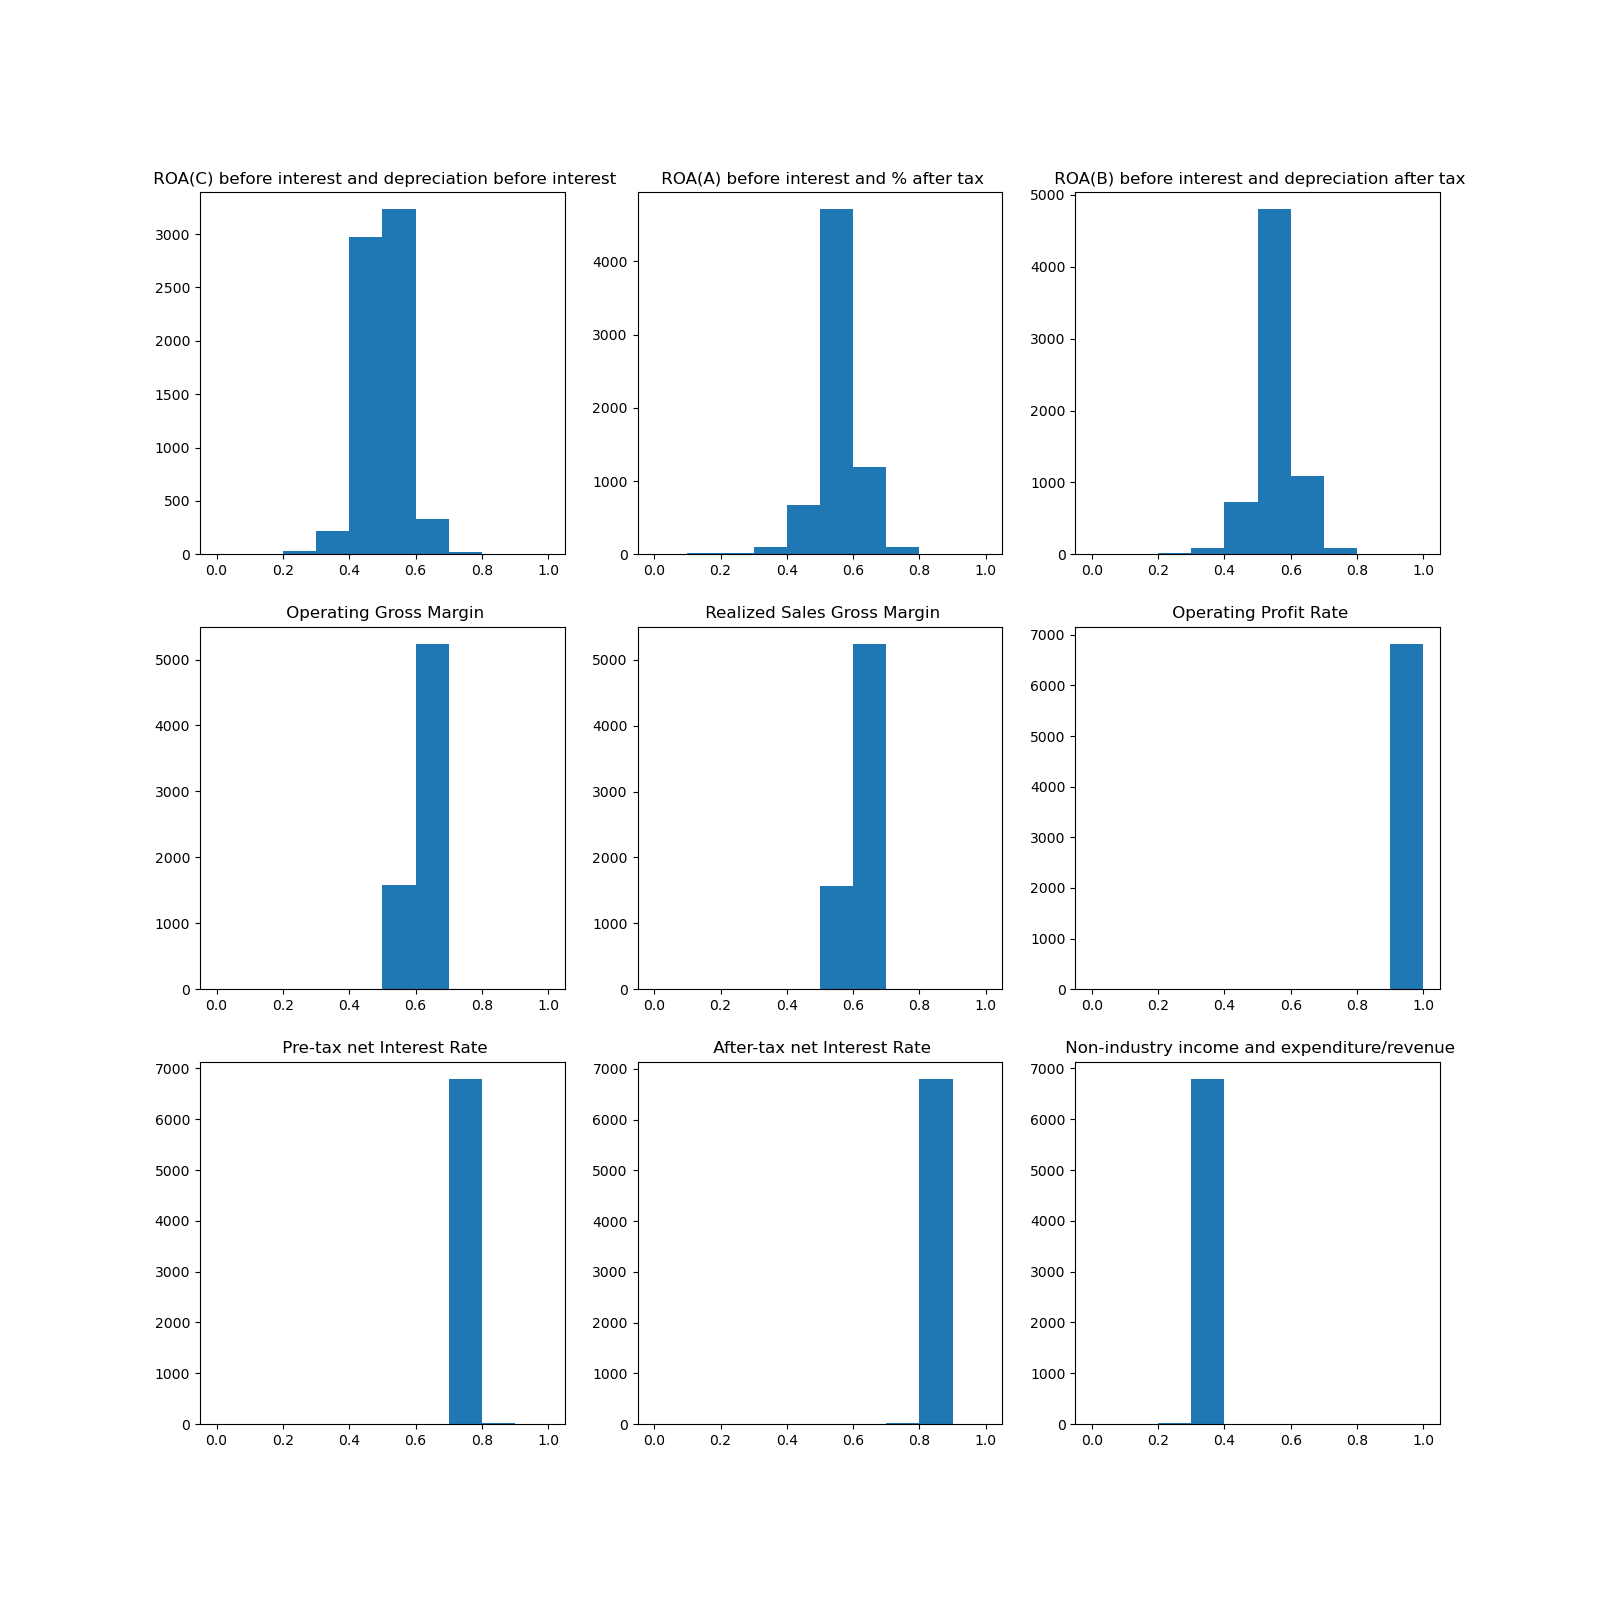

In [23]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=0
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

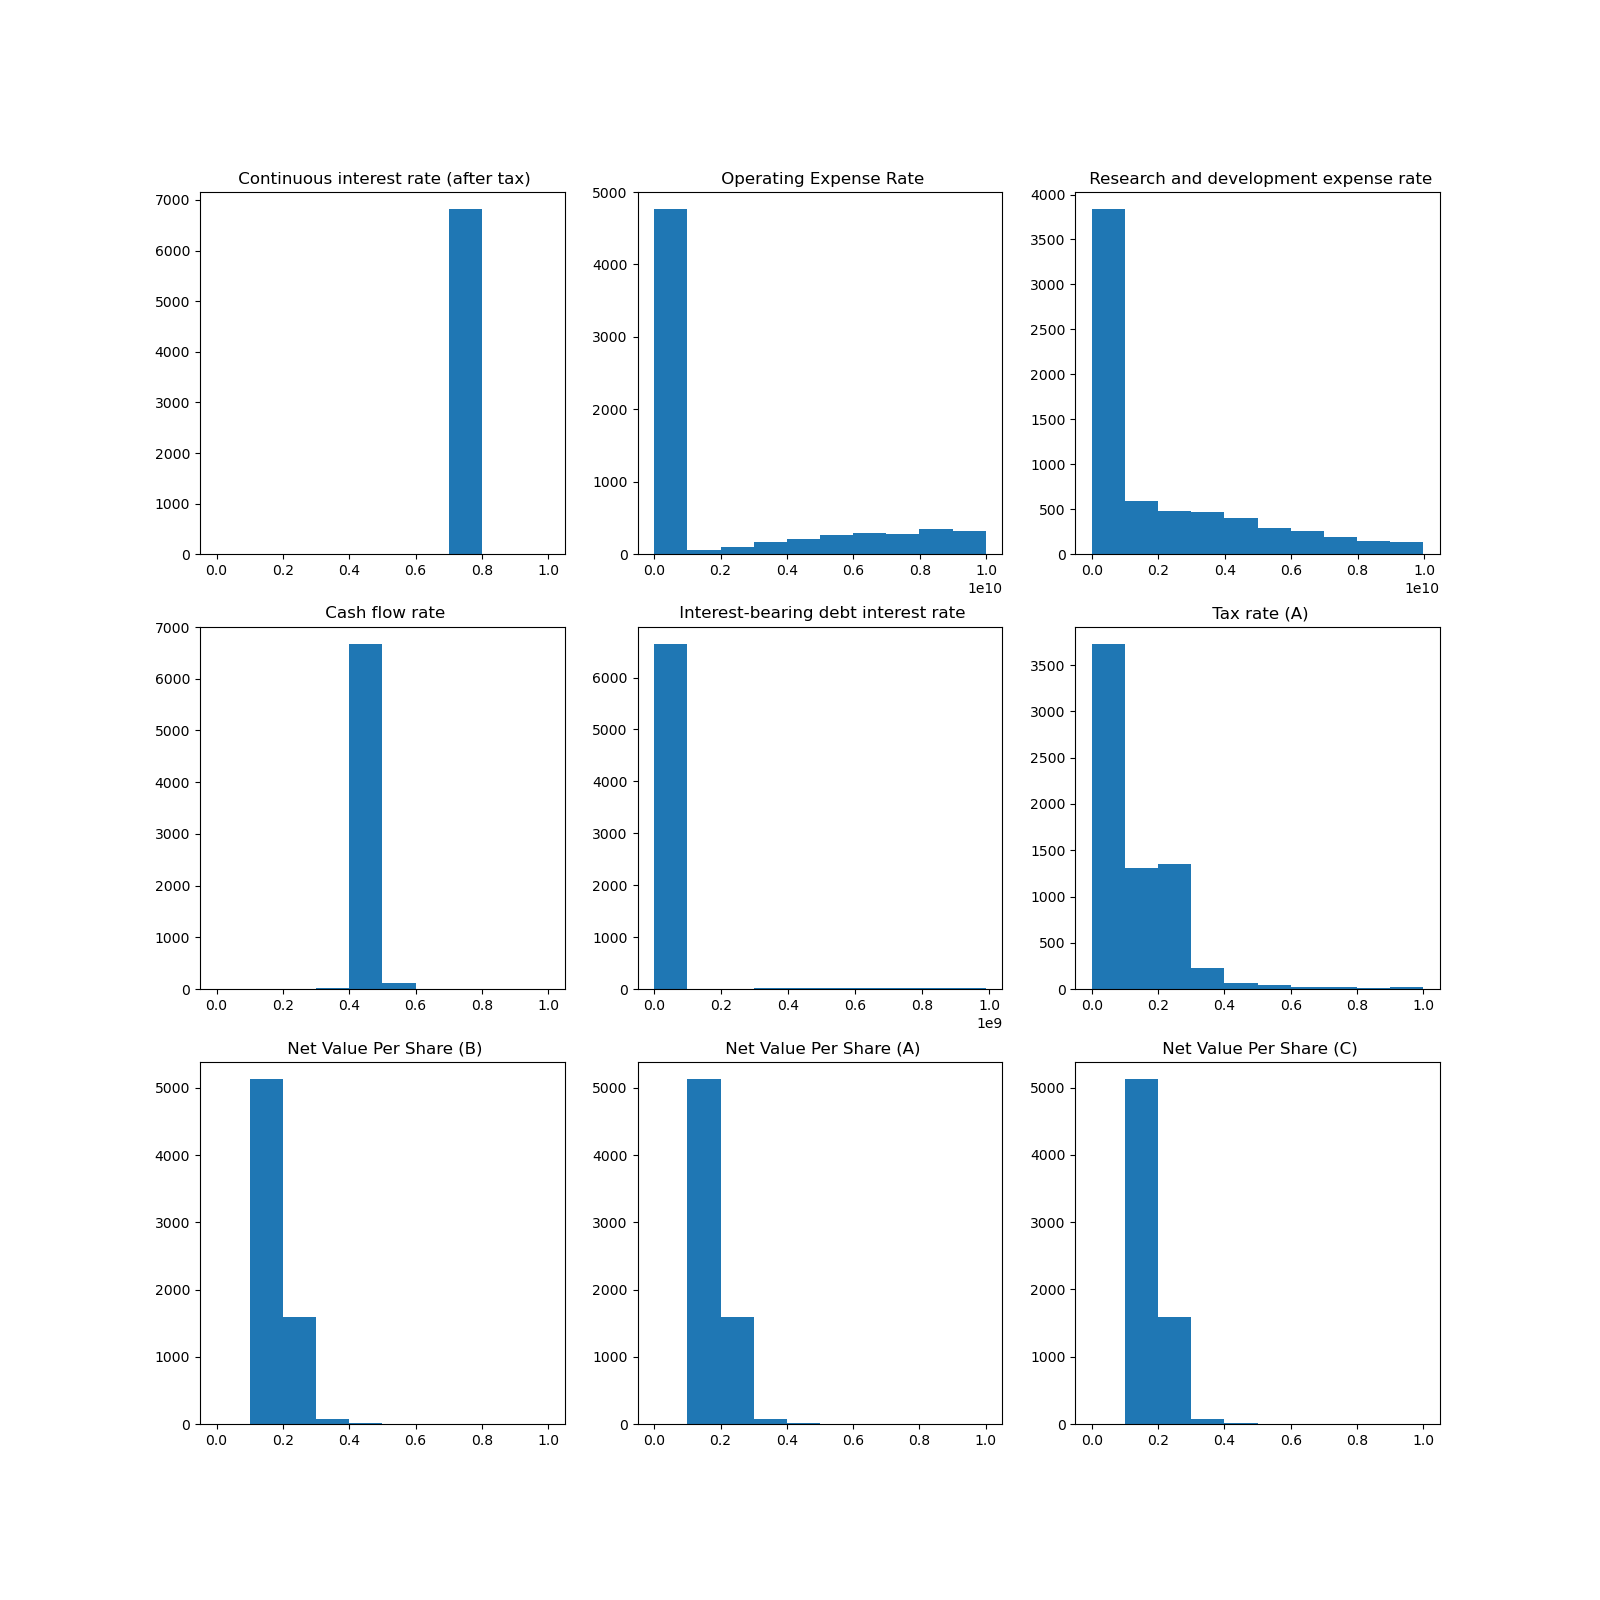

In [24]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=9
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

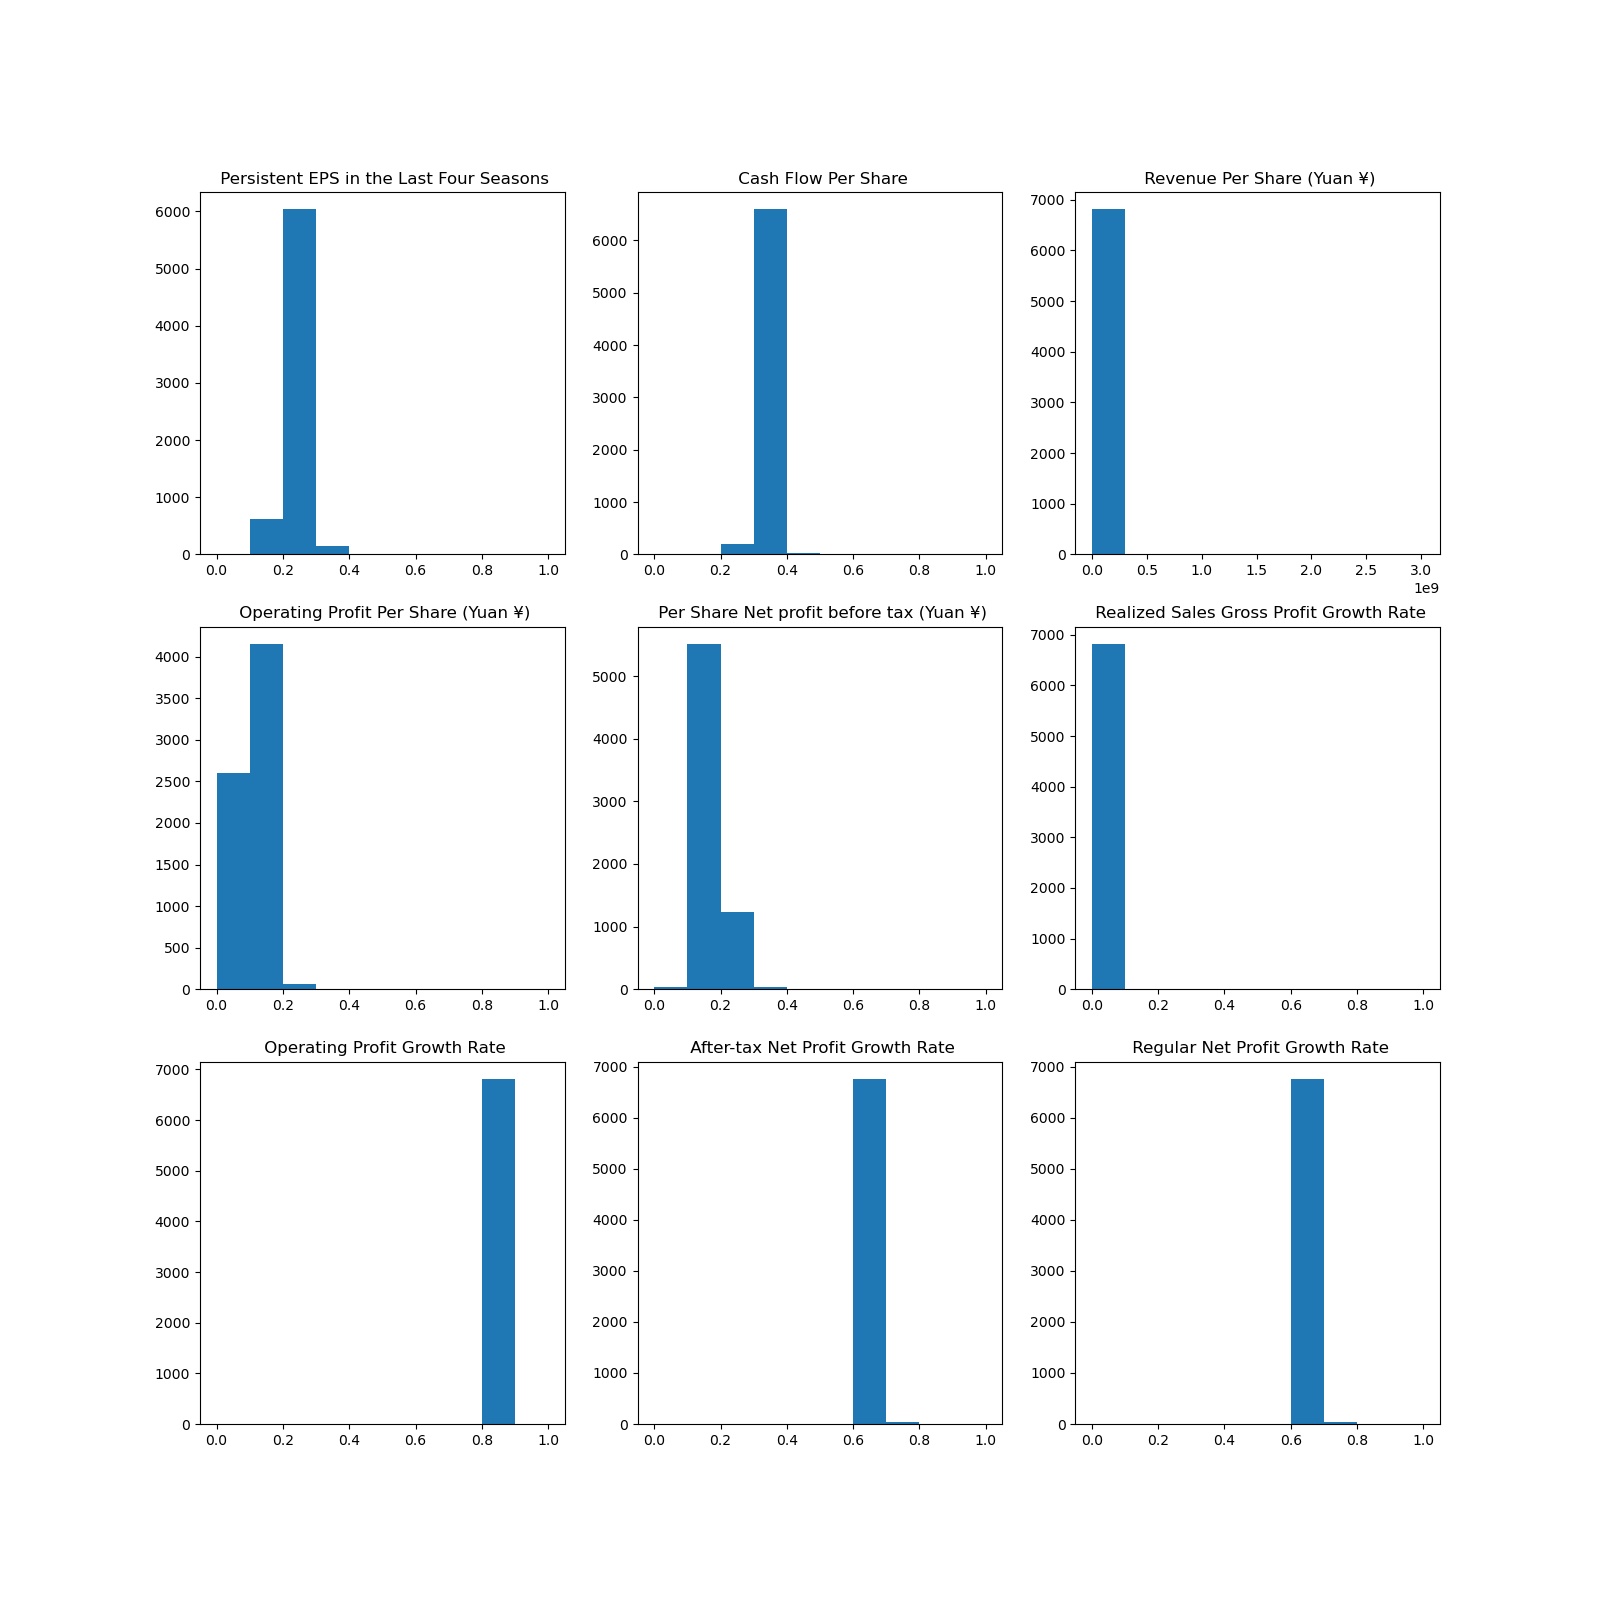

In [25]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=18
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

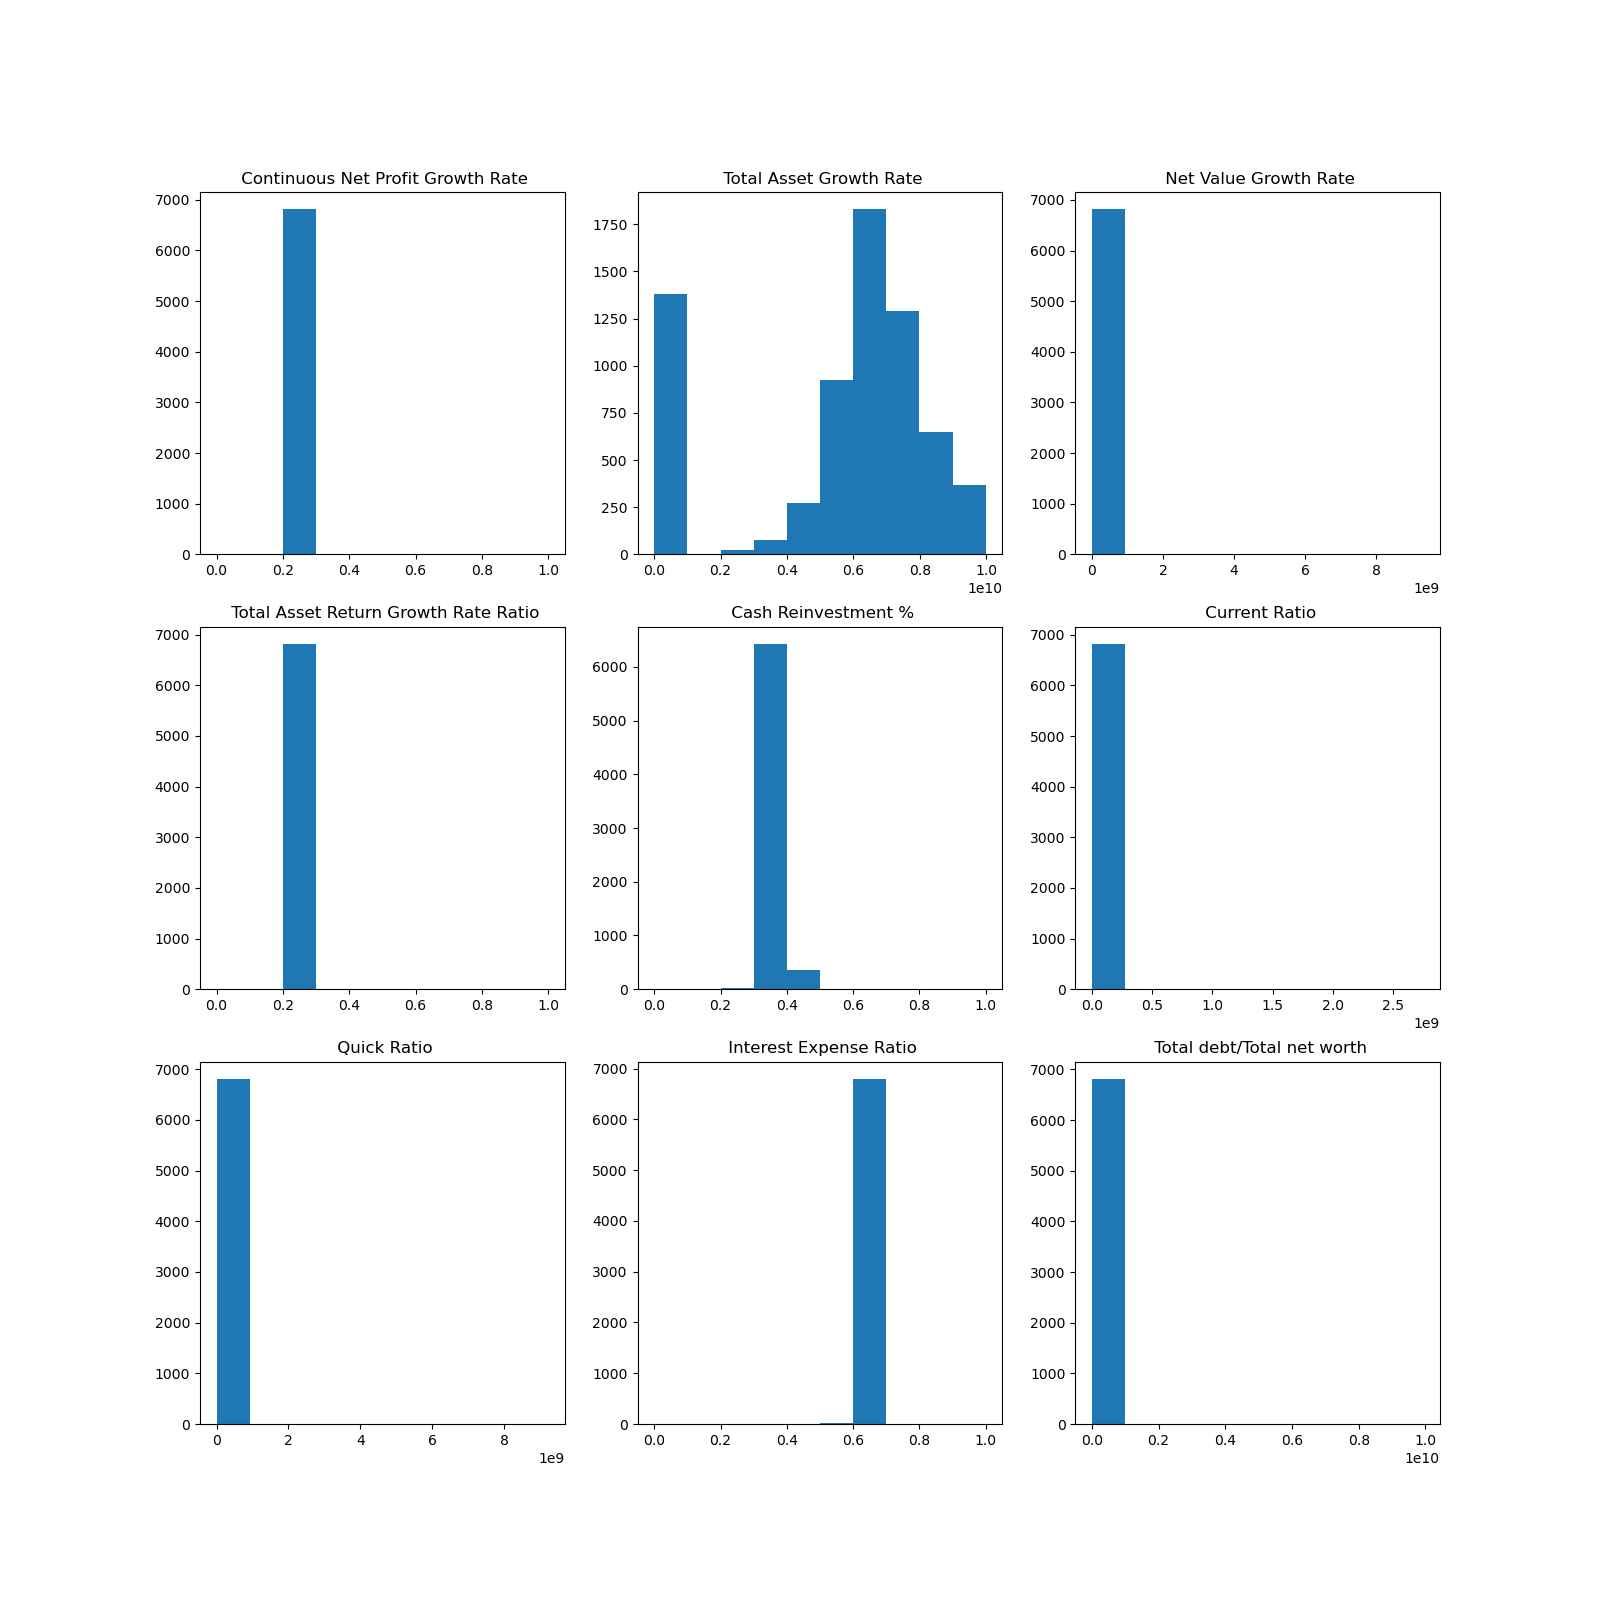

In [26]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=27
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

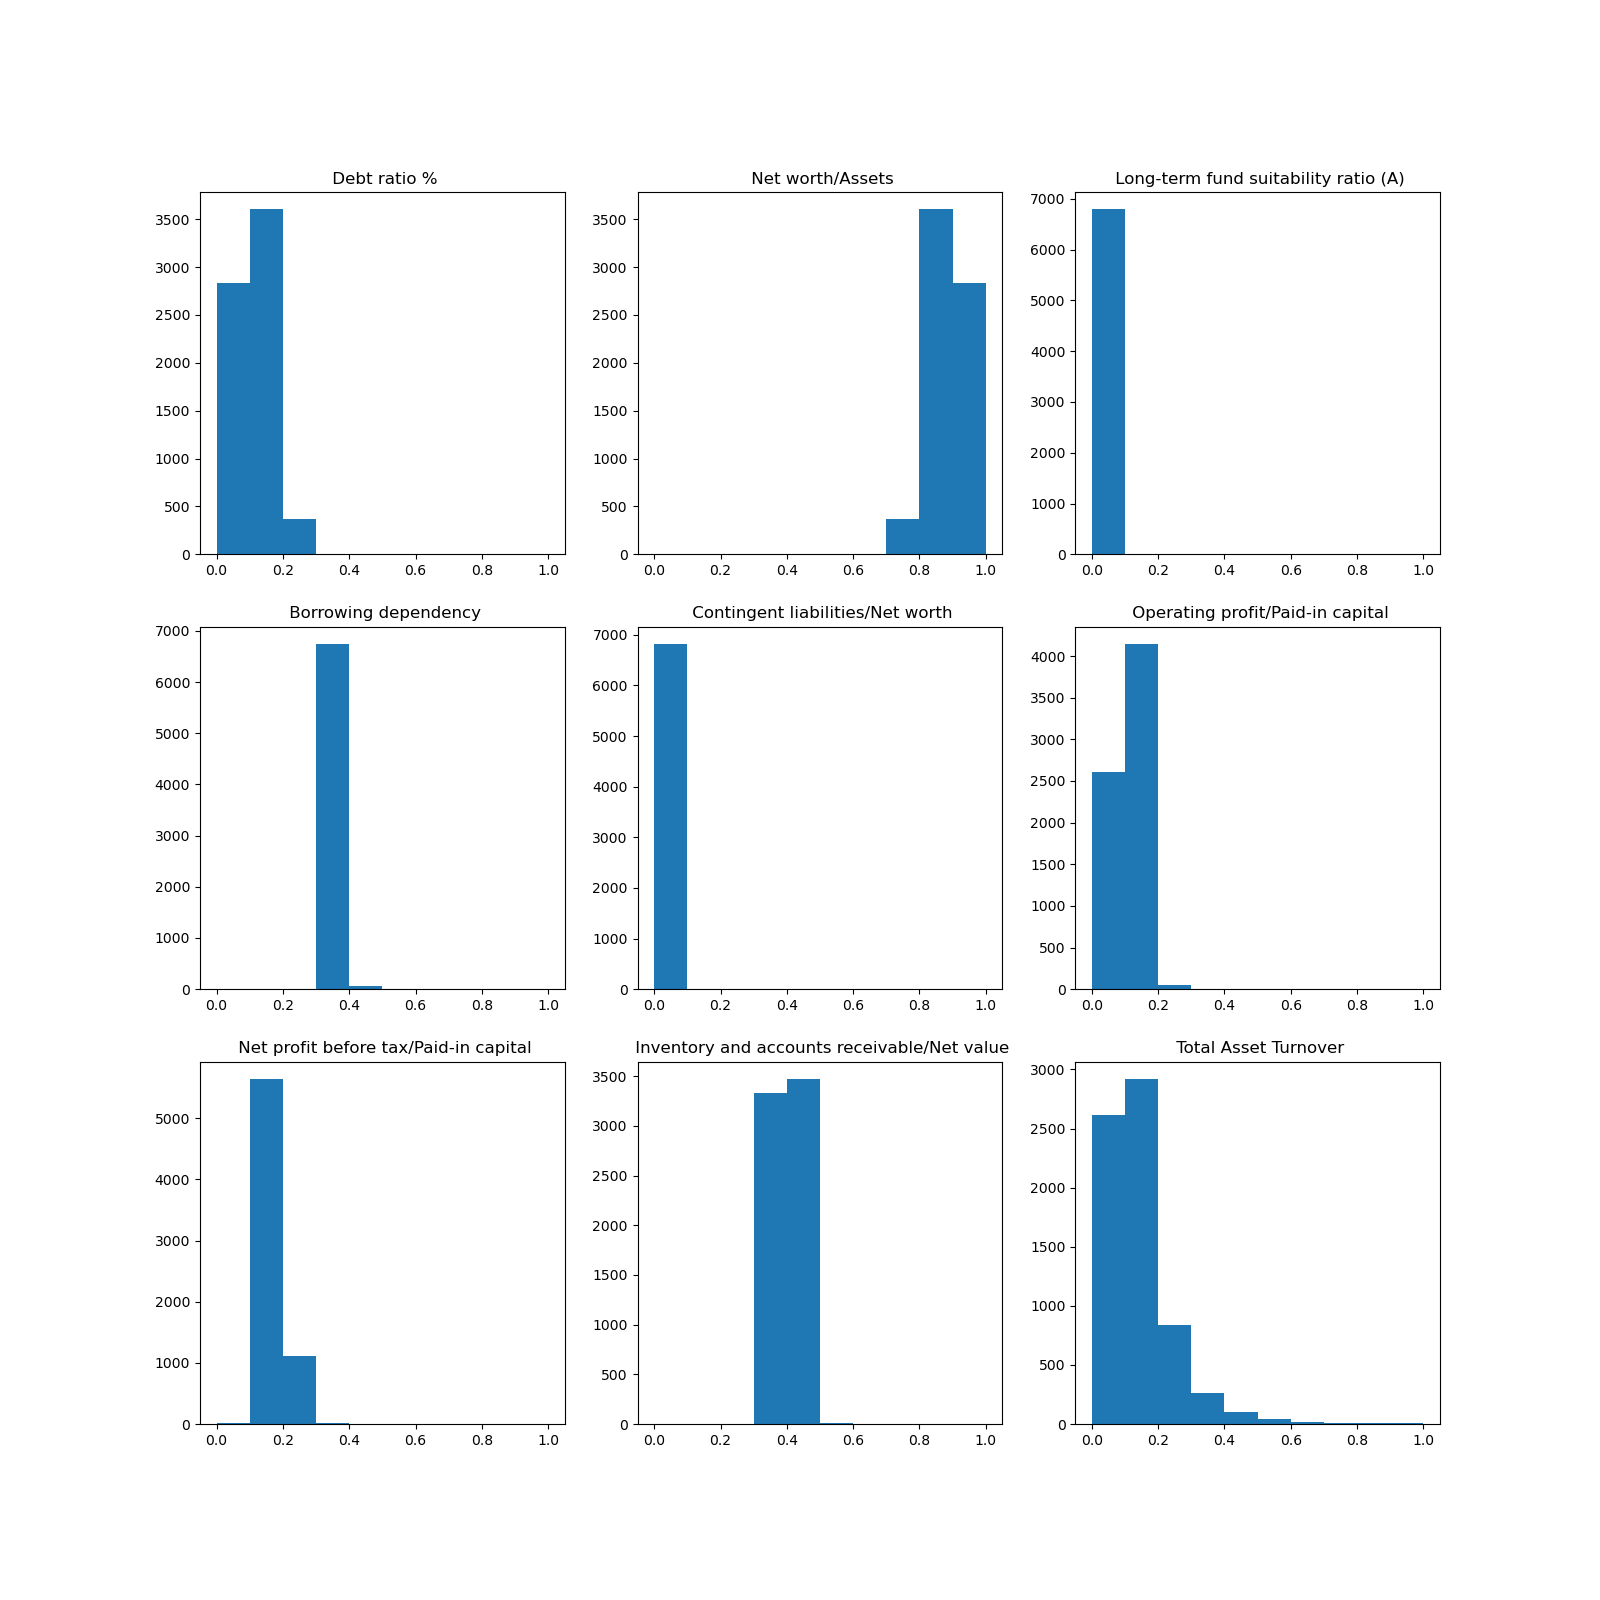

In [27]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=36
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

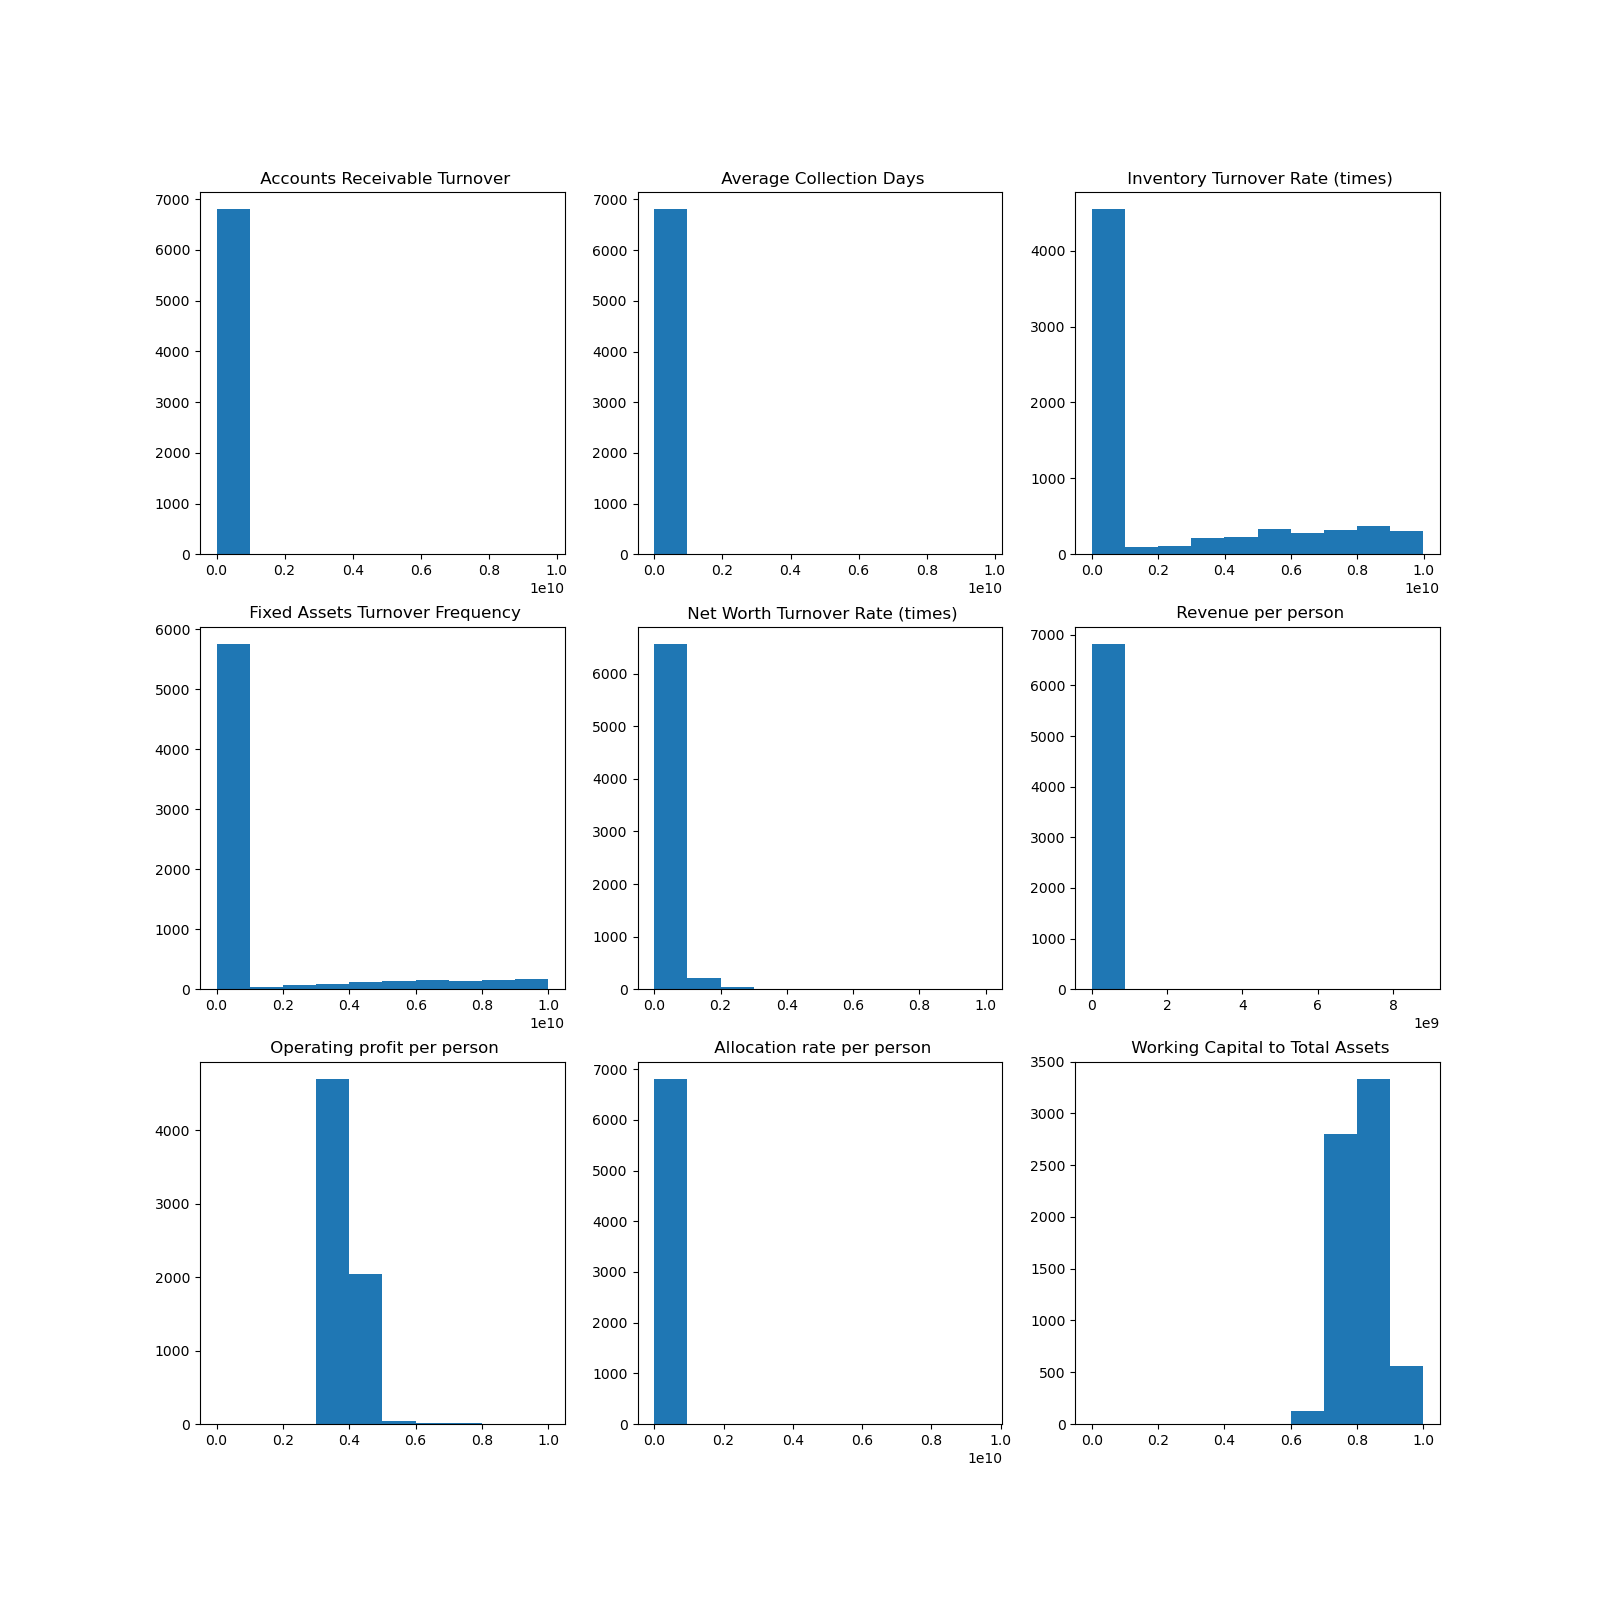

In [28]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=45
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

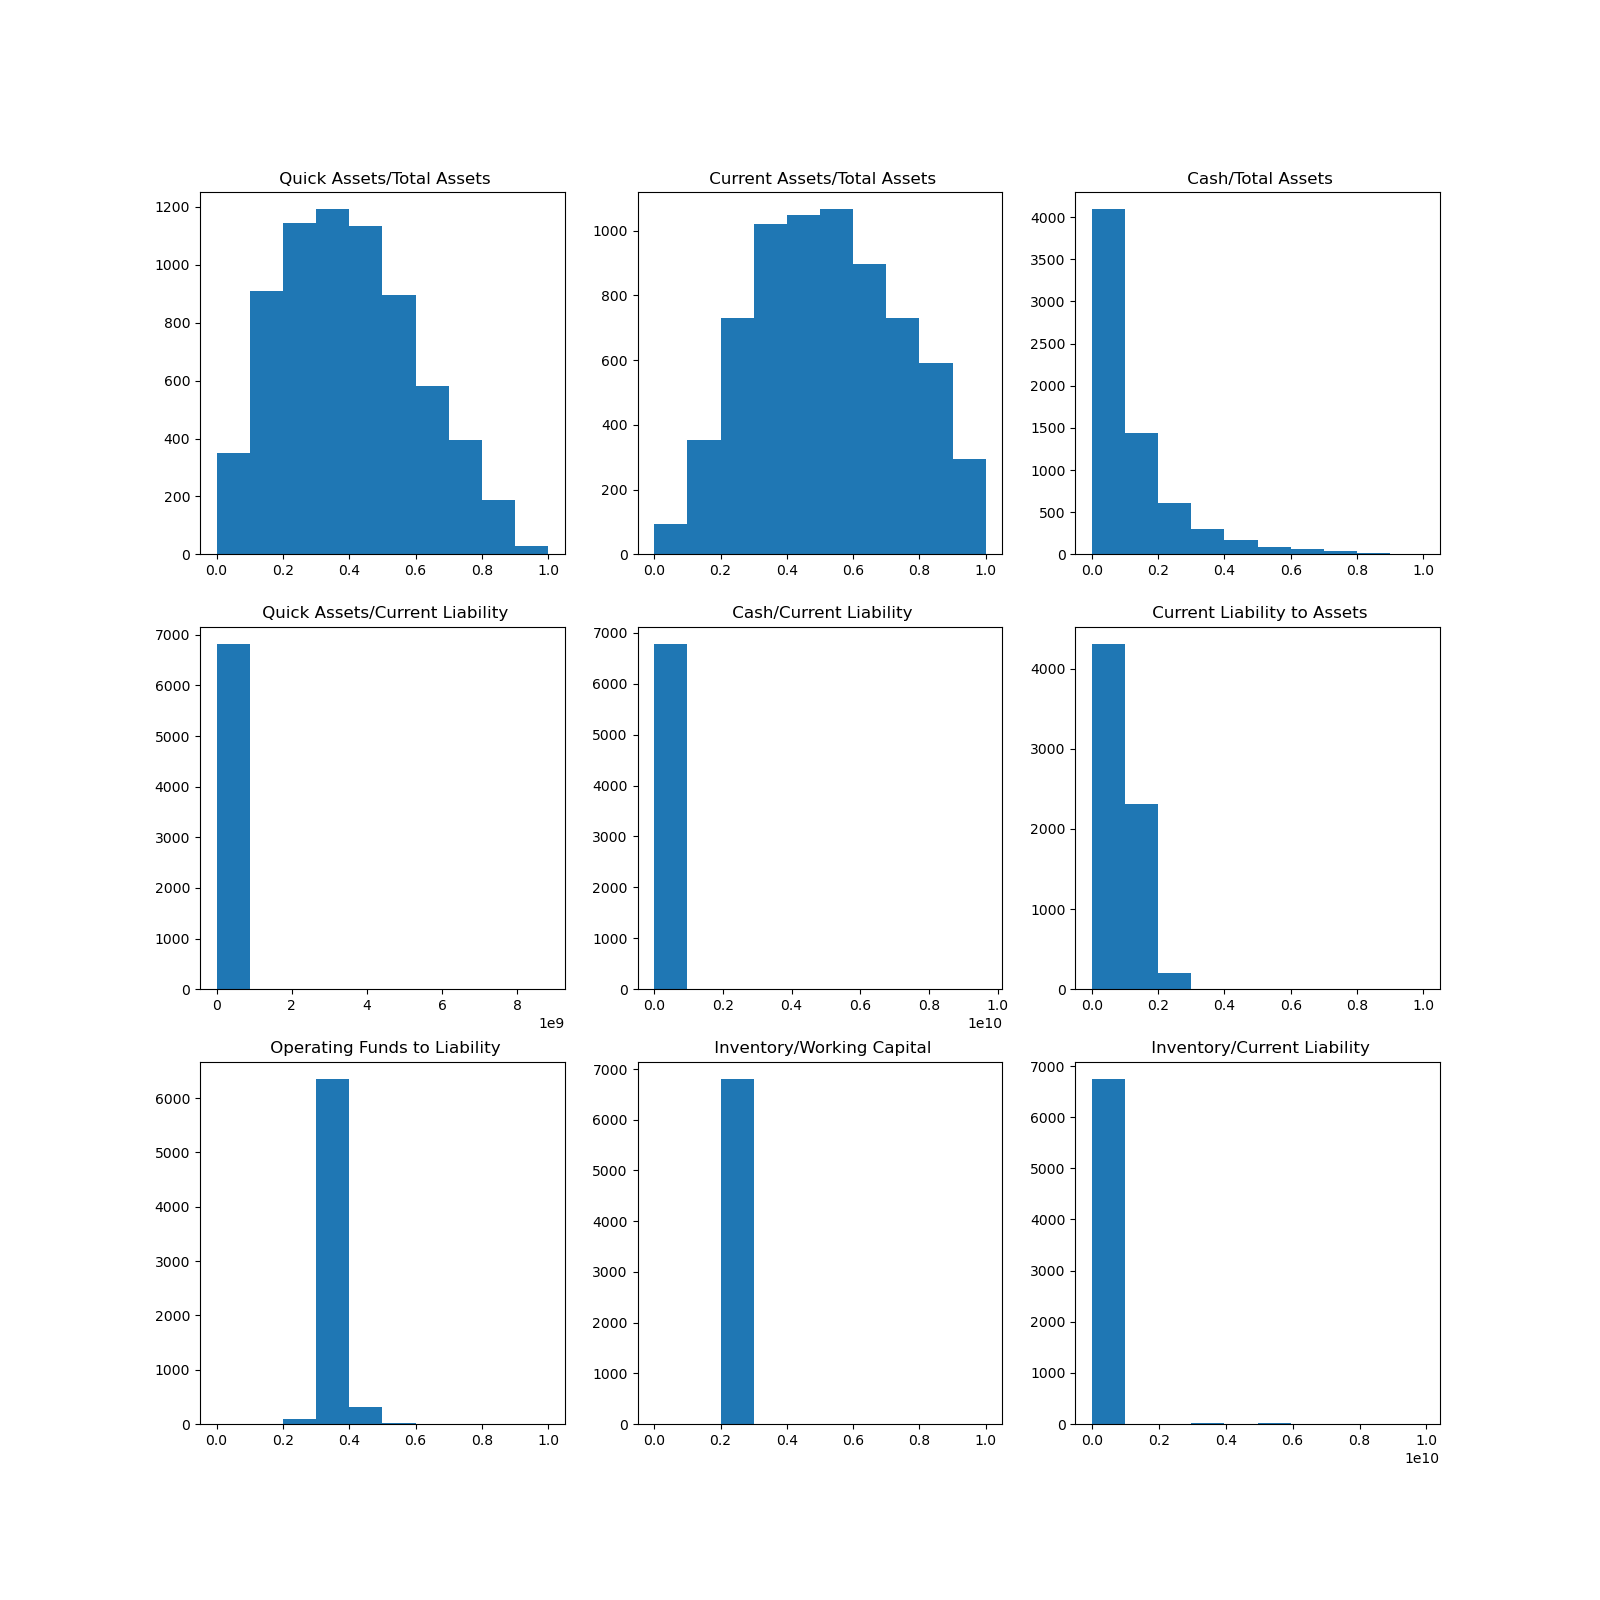

In [29]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=54
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

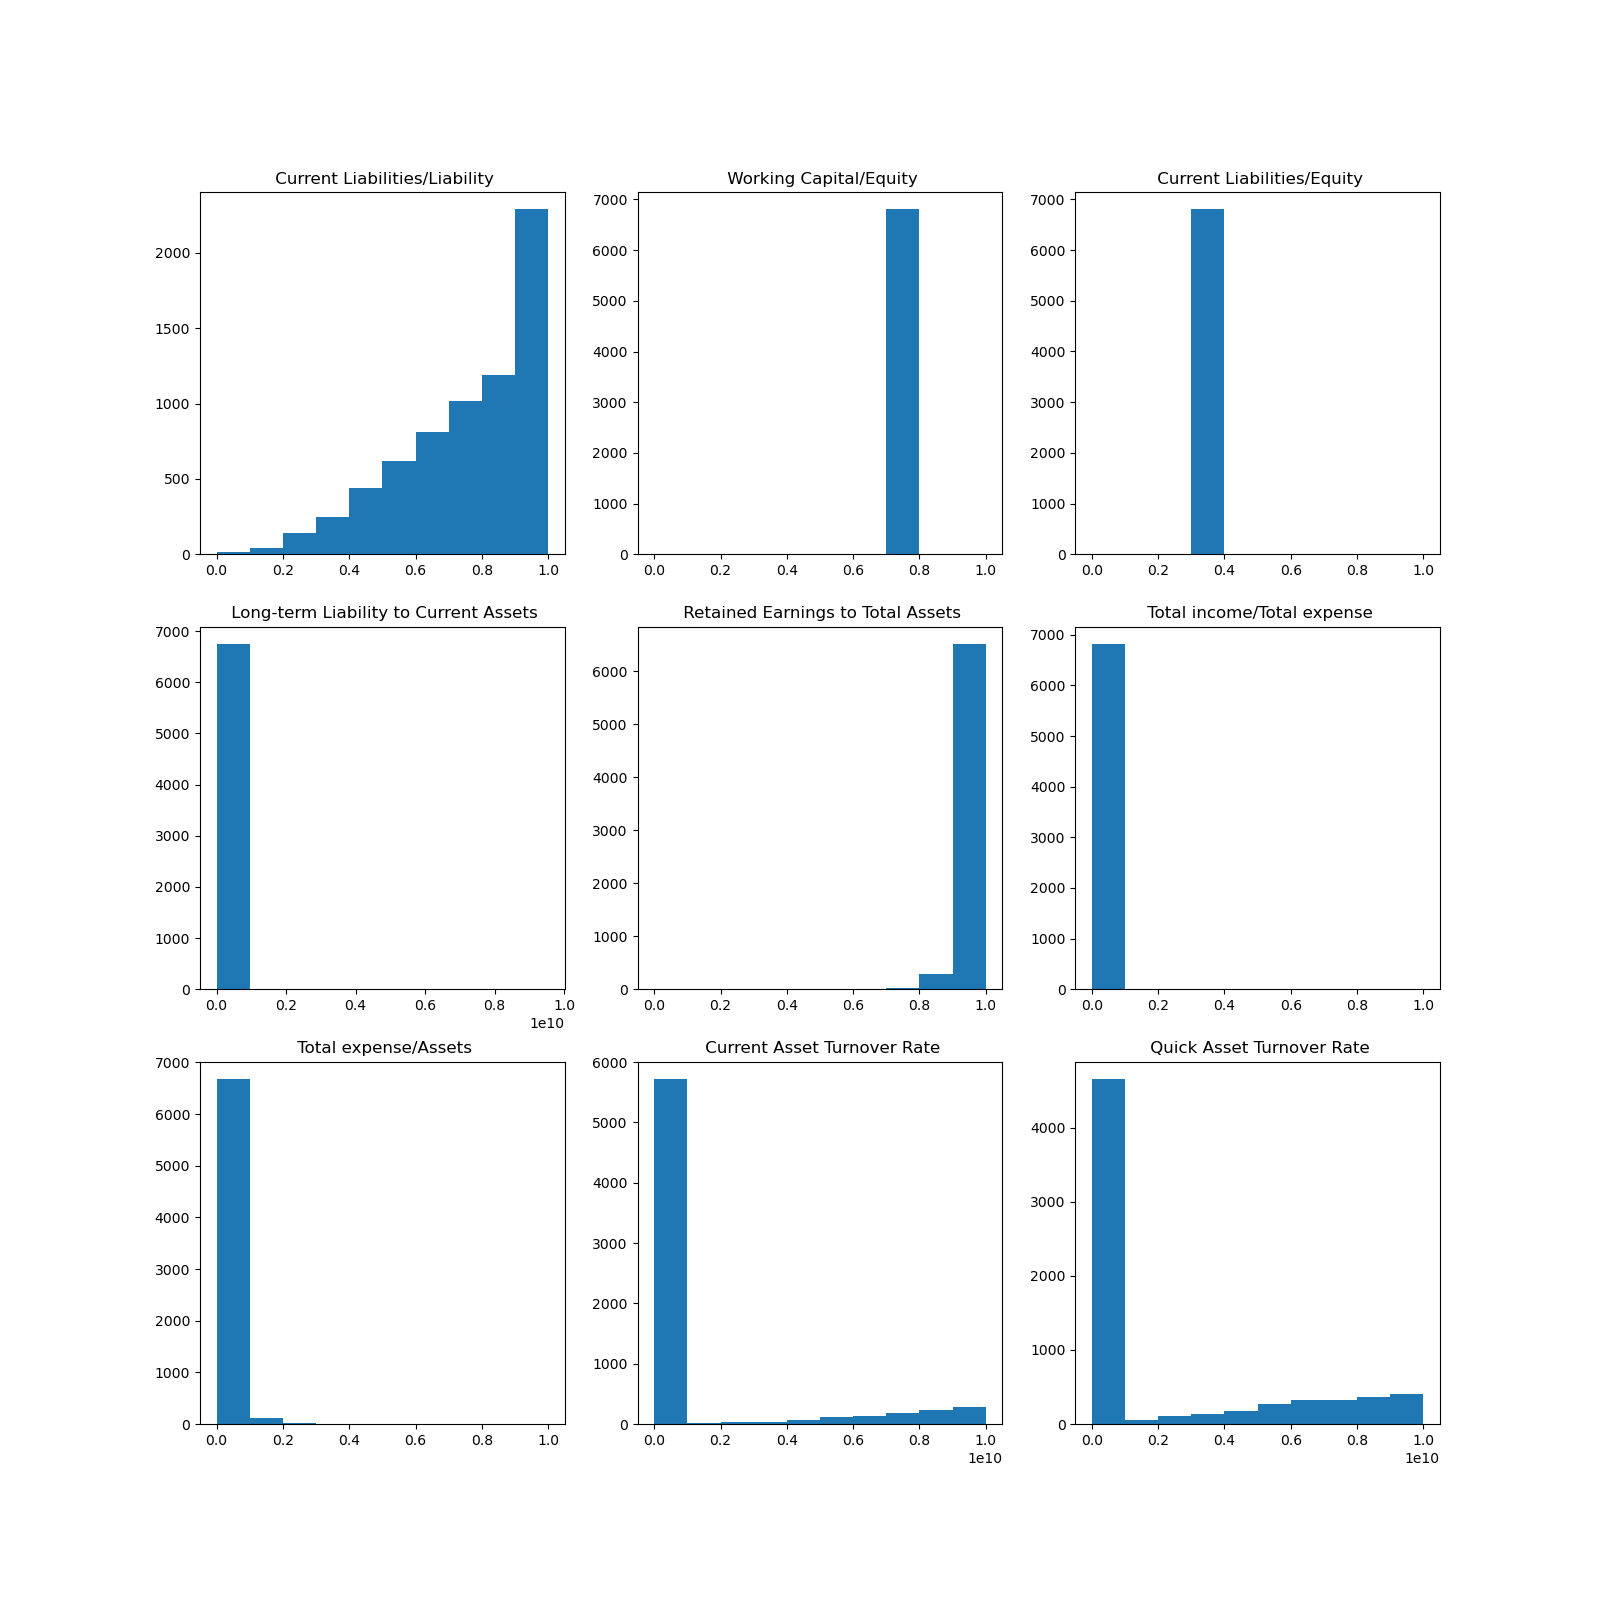

In [30]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=63
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

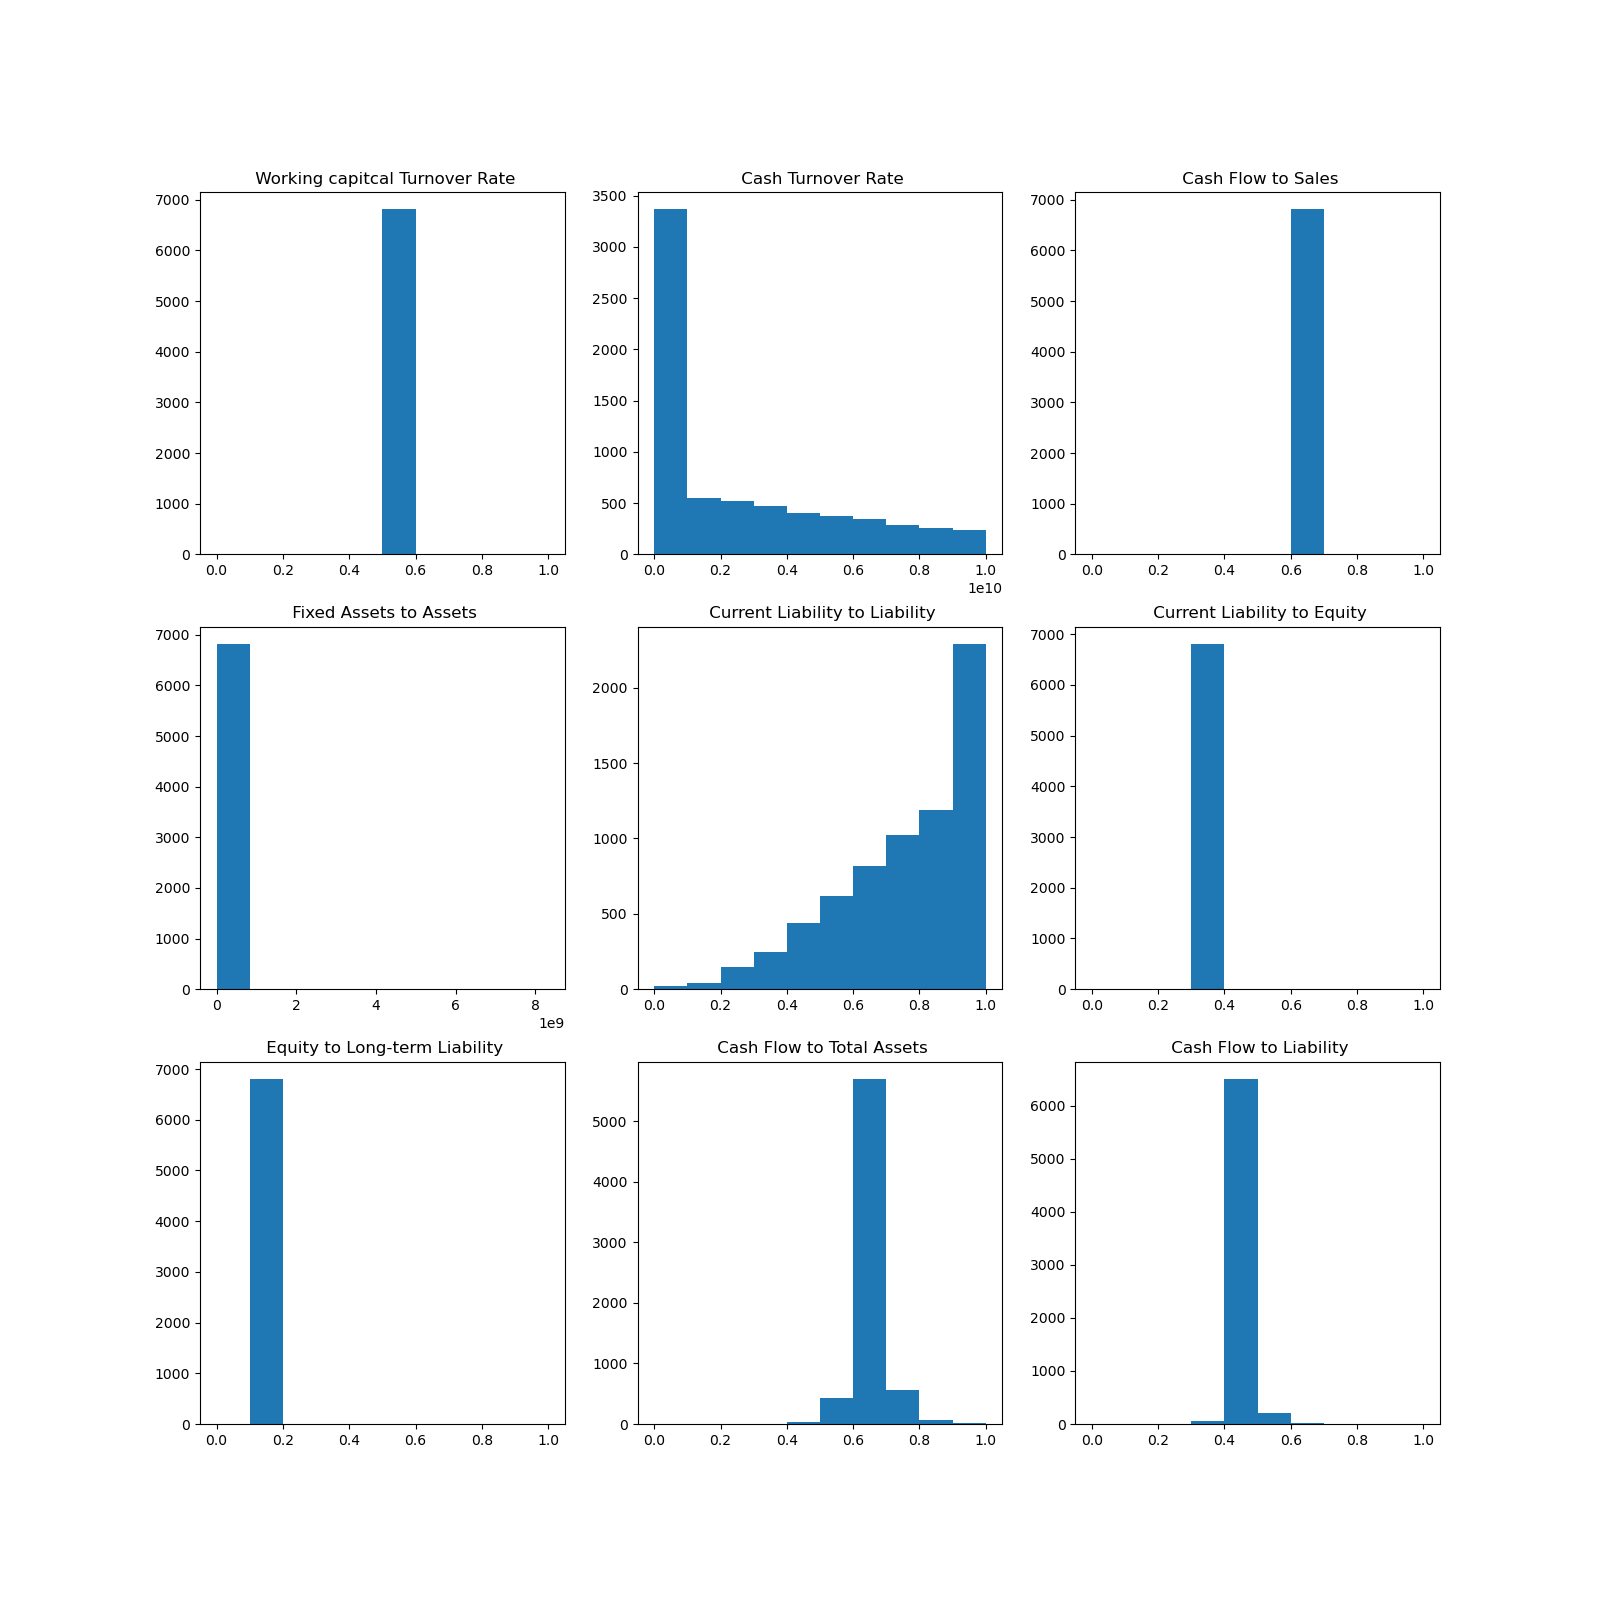

In [31]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=72
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

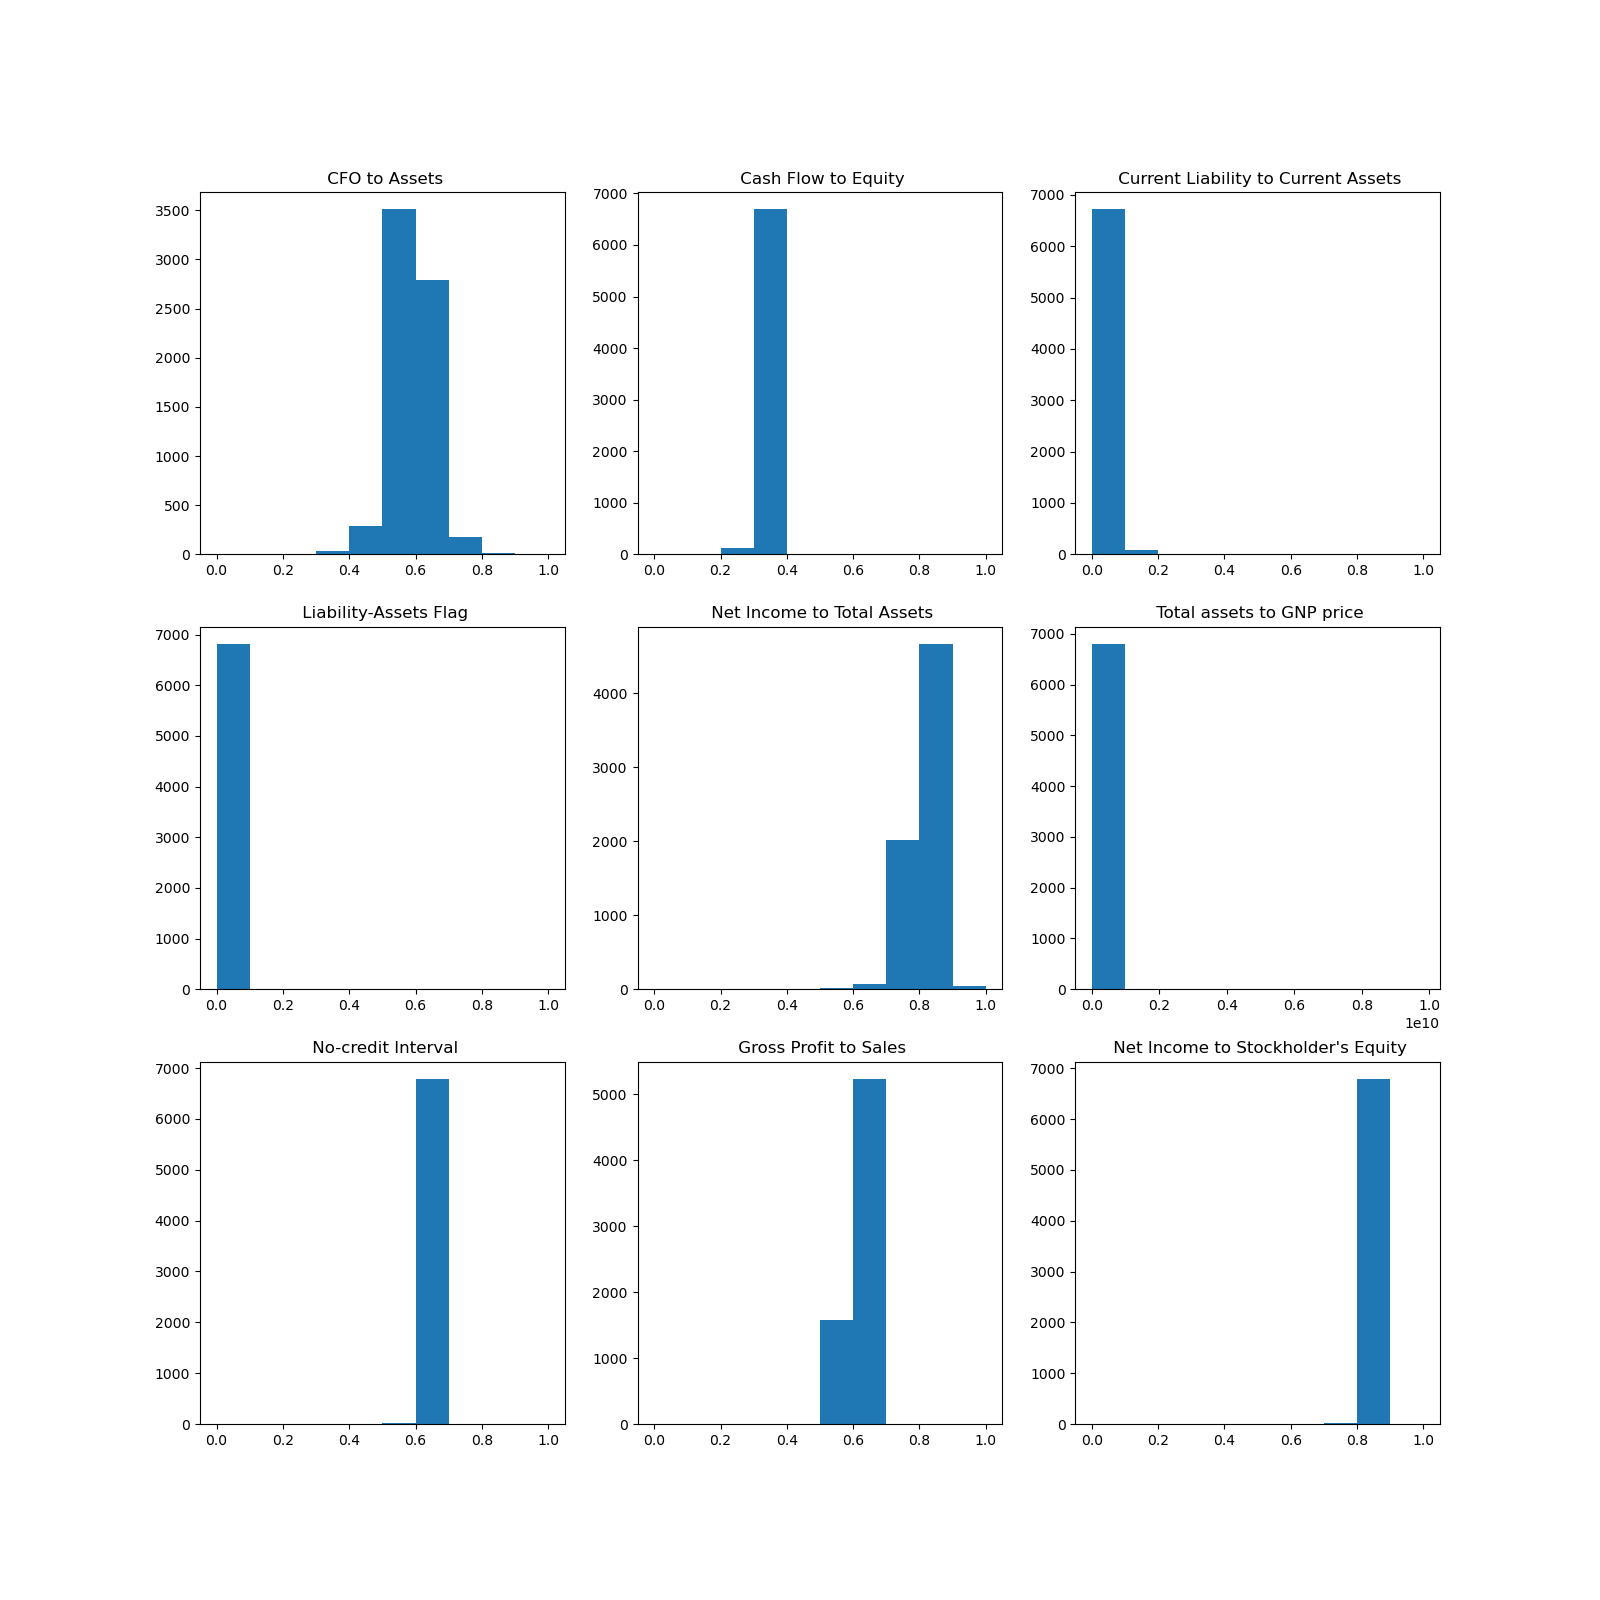

In [32]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
k=81
for i in range(3):
    for j in range(3):
        ax[i,j].hist(X[X.columns[k]])
        ax[i,j].set_title(X.columns[k])
        k+=1

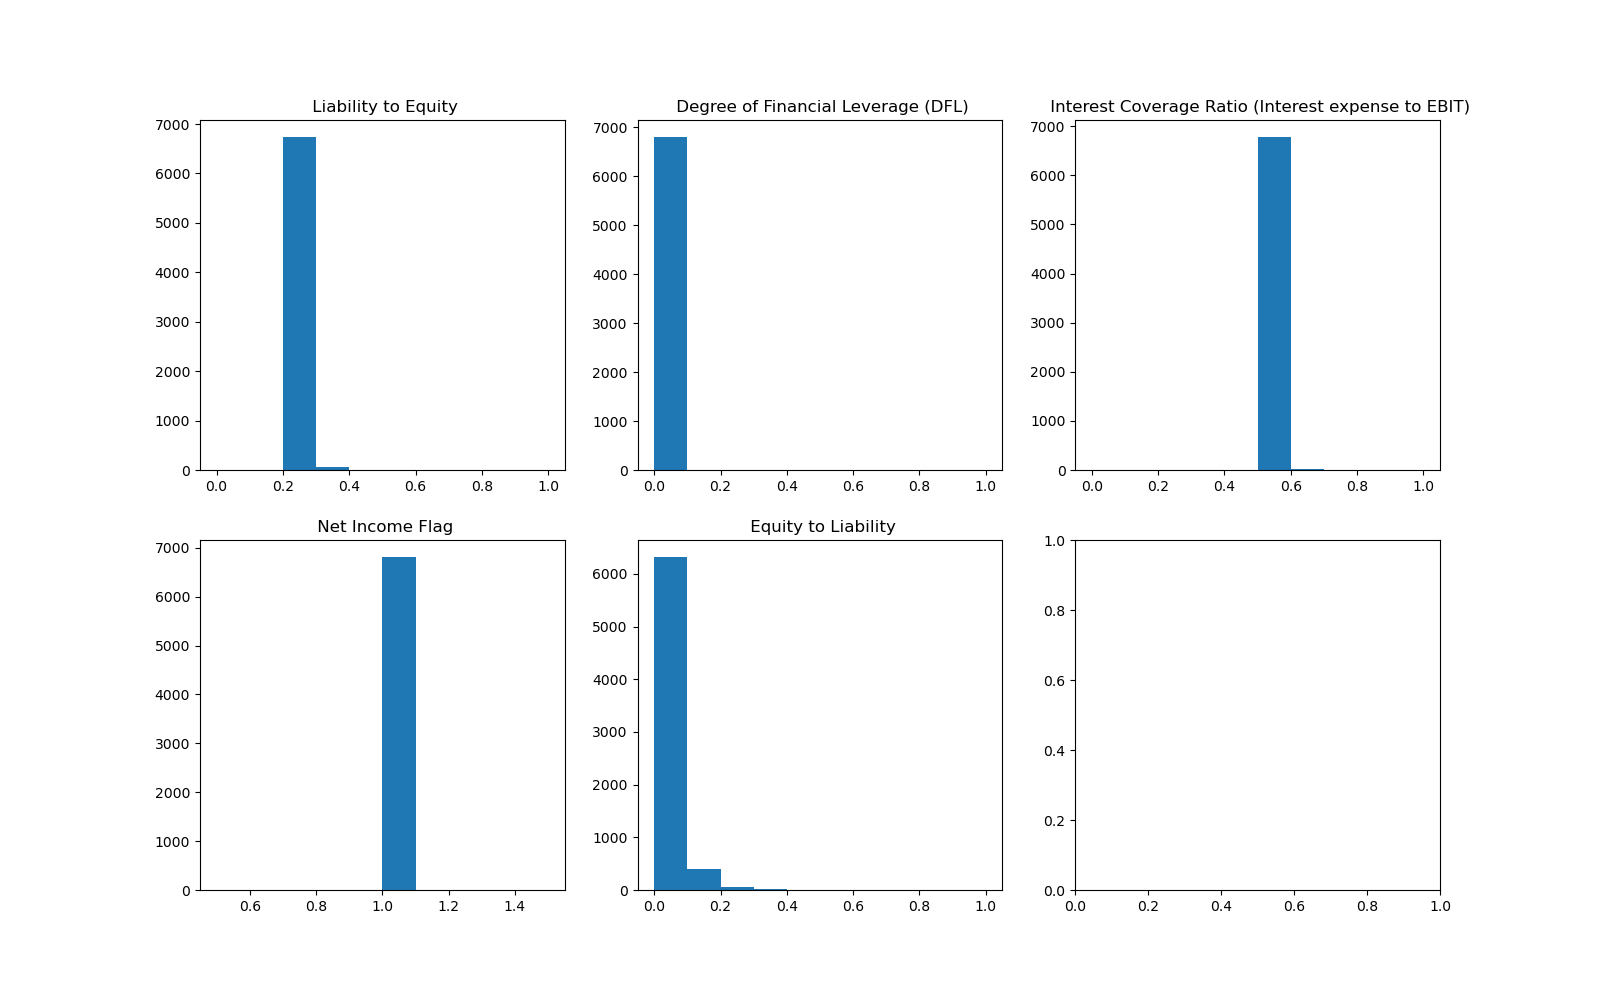

In [33]:
fig,ax=plt.subplots(2,3,figsize=(16,10))
k=90
for i in range(2):
    for j in range(3):
        if (k<=94):
            ax[i,j].hist(X[X.columns[k]])
            ax[i,j].set_title(X.columns[k])
            k+=1

# Feature Selection

### Recursive feature elimination with cross validation

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV


In [35]:
RF_estimator=RandomForestClassifier(random_state=69)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
RF_estimator.fit(X_train,Y_train)
Feature_selector=RFECV(estimator=RF_estimator,scoring='f1',step=1)
Feature_selector.fit(X_train,Y_train)

RFECV(estimator=RandomForestClassifier(random_state=69), scoring='f1')

In [36]:
#Selecting features
indicator=Feature_selector.get_support()
Best_features=[]
for ind,feature in zip(indicator,X.columns):
    if ind:
        Best_features.append(feature)
print("No of Best features: ",len(Best_features))
print("Best features: ",Best_features)

No of Best features:  12
Best features:  [' Non-industry income and expenditure/revenue', ' Interest-bearing debt interest rate', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate', ' Net worth/Assets', ' Borrowing dependency', ' Cash/Total Assets', ' Working Capital/Equity', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Interest Coverage Ratio (Interest expense to EBIT)']


In [37]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (f1)")
plt.plot(
    range(1, len(Feature_selector.grid_scores_) + 1),
    Feature_selector.grid_scores_,
)
plt.show();

In [38]:
X_Best=X[Best_features]
print(X_Best.shape)
print(X_Best.columns)

(6819, 12)
Index([' Non-industry income and expenditure/revenue',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Persistent EPS in the Last Four Seasons', ' Net Value Growth Rate',
       ' Net worth/Assets', ' Borrowing dependency', ' Cash/Total Assets',
       ' Working Capital/Equity', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity',
       ' Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')


# Standardization

In [39]:
X_Best.head()

Non-industry income and expenditure/revenue  \
0                                      0.302646   
1                                      0.303556   
2                                      0.302035   
3                                      0.303350   
4                                      0.303475   

    Interest-bearing debt interest rate   Net Value Per Share (B)  \
0                              0.000725                  0.147950   
1                              0.000647                  0.182251   
2                              0.000790                  0.177911   
3                              0.000449                  0.154187   
4                              0.000686                  0.167502   

    Persistent EPS in the Last Four Seasons   Net Value Growth Rate  \
0                                  0.169141                0.000327   
1                                  0.208944                0.000443   
2                                  0.180581                0.000396   
3                                  0.193722                0.000382   
4                                  0.212537                0.000439   

    Net worth/Assets   Borrowing dependency   Cash/Total Assets  \
0           0.792424               0.390284            0.004094   
1           0.828824               0.376760            0.014948   
2           0.792484               0.379093            0.000991   
3           0.848535               0.379743            0.018851   
4           0.893491               0.375025            0.014161   

    Working Capital/Equity   Net Income to Total Assets  \
0                 0.721275                     0.716845   
1                 0.731975                     0.795297   
2                 0.742729                     0.774670   
3                 0.729825                     0.739555   
4                 0.732000                     0.795016   

    Net Income to Stockholder's Equity  \
0                             0.827890   
1                             0.839969   
2                             0.836774   
3                             0.834697   
4                             0.839973   

    Interest Coverage Ratio (Interest expense to EBIT)  
0                                           0.564050    
1                                           0.570175    
2                                           0.563706    
3                                           0.564663    
4                                           0.575617

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler().fit(X_Best)
X_Best_Scaled=scaler.transform(X_Best)
X_Best_Scaled=pandas.DataFrame(data=X_Best_Scaled,columns=X_Best.columns)
X_Best_Scaled.head()

Non-industry income and expenditure/revenue  \
0                                     -0.087479   
1                                     -0.005957   
2                                     -0.142238   
3                                     -0.024491   
4                                     -0.013254   

    Interest-bearing debt interest rate   Net Value Per Share (B)  \
0                             -0.151921                 -1.279247   
1                             -0.151921                 -0.251878   
2                             -0.151921                 -0.381876   
3                             -0.151921                 -1.092453   
4                             -0.151921                 -0.693621   

    Persistent EPS in the Last Four Seasons   Net Value Growth Rate  \
0                                 -1.794106               -0.013721   
1                                 -0.597379               -0.013721   
2                                 -1.450153               -0.013721   
3                                 -1.055034               -0.013721   
4                                 -0.489361               -0.013721   

    Net worth/Assets   Borrowing dependency   Cash/Total Assets  \
0          -1.750845               0.959784           -0.861820   
1          -1.075727               0.129305           -0.783873   
2          -1.749724               0.272560           -0.884109   
3          -0.710131               0.312459           -0.755844   
4           0.123674               0.022791           -0.789524   

    Working Capital/Equity   Net Income to Total Assets  \
0                -1.245334                    -2.254317   
1                -0.328953                    -0.309033   
2                 0.591934                    -0.820510   
3                -0.513105                    -1.691222   
4                -0.326867                    -0.316008   

    Net Income to Stockholder's Equity  \
0                            -0.861611   
1                            -0.029804   
2                            -0.249820   
3                            -0.392864   
4                            -0.029564   

    Interest Coverage Ratio (Interest expense to EBIT)  
0                                          -0.098978    
1                                           0.364559    
2                                          -0.125015    
3                                          -0.052562    
4                                           0.776395

# Logistic Regression with Best Features

## Train-Test split

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X_Best_Scaled,Y,test_size=0.33,random_state=42)
print(X_train.shape,X_test.shape)

(4568, 12) (2251, 12)


## Model Training

In [43]:
model=LogisticRegression(max_iter=10000,random_state=42)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=10000, random_state=42)

## Prediction

In [44]:
predict=model.predict(X_test)
print(predict.shape)

(2251,)


## Performance 

In [45]:
print(classification_report(predict,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2227
           1       0.15      0.50      0.23        24

    accuracy                           0.96      2251
   macro avg       0.57      0.73      0.61      2251
weighted avg       0.99      0.96      0.97      2251



In [46]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

[[2158   12]
 [  69   12]]


## Visualization

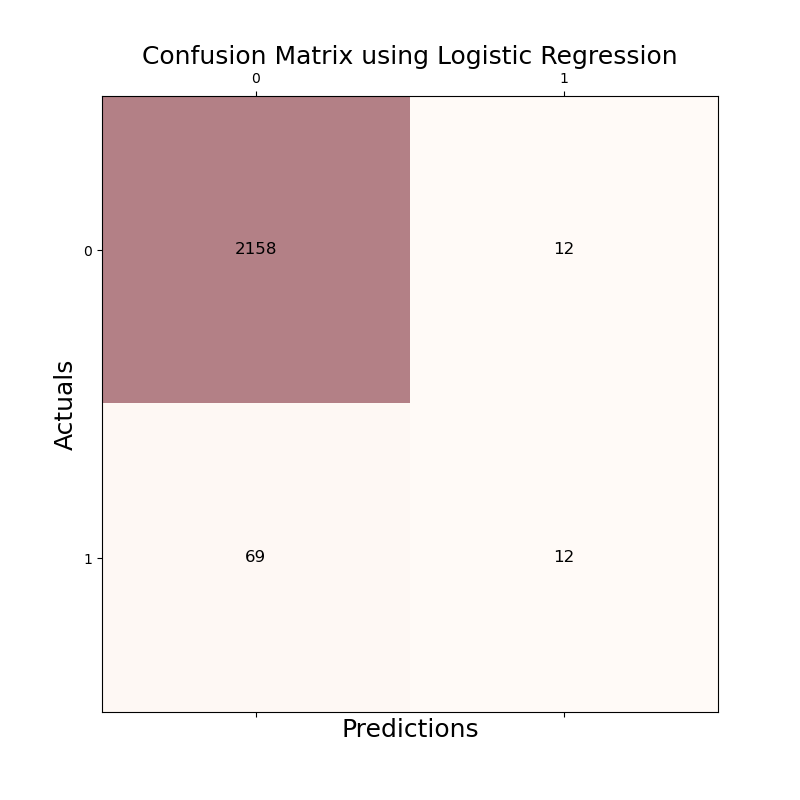

In [47]:
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Reds,alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# UpSample(Sampling With Replacement)

In [48]:
from sklearn.utils import resample

In [49]:
X_train["Bankrupt?"]=Y_train.copy(deep=True)
print(X_train.shape)
X_train.head()

(4568, 13)


0         1         2         3         4         5         6  \
1892 -0.011370 -0.151921 -0.730223 -0.722452 -0.013721 -0.650694  0.166252   
5965 -0.015744 -0.151921 -0.424789 -0.395555 -0.013721 -0.915358 -0.166407   
4420 -0.016112 -0.151921 -0.480322 -0.355759 -0.013721  1.019719 -0.196555   
5638 -0.035231 -0.151921 -0.474012 -0.514944 -0.013721  1.181209 -0.221896   
1071 -0.041012 -0.151921 -0.094112 -1.882226 -0.013721 -0.896854  0.485038   

             7         8         9        10        11  Bankrupt?  
1892  0.467999  0.438147 -0.705918 -0.131248 -0.182859          0  
5965 -0.213916  0.309847 -0.259896 -0.015506  0.083939          0  
4420  1.521764  0.310785 -0.103203  0.005576 -0.007880          0  
5638 -0.161004 -0.213207 -0.784575 -0.101184 -0.025599          0  
1071 -0.548236 -0.395837 -1.573821 -0.386848 -0.078172          0

In [50]:
#Minority Class
X_train_Bankrupt=X_train[X_train["Bankrupt?"]==1]
print(X_train_Bankrupt.shape)

(139, 13)


In [51]:
#Majority Class
X_train_not_Bankrupt=X_train[X_train["Bankrupt?"]==0]
print(X_train_not_Bankrupt.shape)
X_train_not_Bankrupt.head()

(4429, 13)


0         1         2         3         4         5         6  \
1892 -0.011370 -0.151921 -0.730223 -0.722452 -0.013721 -0.650694  0.166252   
5965 -0.015744 -0.151921 -0.424789 -0.395555 -0.013721 -0.915358 -0.166407   
4420 -0.016112 -0.151921 -0.480322 -0.355759 -0.013721  1.019719 -0.196555   
5638 -0.035231 -0.151921 -0.474012 -0.514944 -0.013721  1.181209 -0.221896   
1071 -0.041012 -0.151921 -0.094112 -1.882226 -0.013721 -0.896854  0.485038   

             7         8         9        10        11  Bankrupt?  
1892  0.467999  0.438147 -0.705918 -0.131248 -0.182859          0  
5965 -0.213916  0.309847 -0.259896 -0.015506  0.083939          0  
4420  1.521764  0.310785 -0.103203  0.005576 -0.007880          0  
5638 -0.161004 -0.213207 -0.784575 -0.101184 -0.025599          0  
1071 -0.548236 -0.395837 -1.573821 -0.386848 -0.078172          0

In [52]:
X_train_Upscaled=resample(X_train_Bankrupt,n_samples=4426,random_state=42)
print(X_train_Upscaled.shape)
X_train_Upscaled.head()

(4426, 13)


0         1         2         3         4         5          6  \
2026 -0.023019 -0.151921 -0.692359 -1.958975 -0.013721 -1.878131   0.943783   
6499 -0.046014 -0.151921 -1.199733 -1.742939 -0.013721 -1.047130   0.134455   
3114 -0.017433 -0.151921 -0.605273 -0.327333 -0.013721 -0.175195   0.009193   
3448 -0.387951 -0.151921 -1.251481 -1.572384 -0.013721 -0.096693   0.119622   
427  -0.111296 -0.151921 -1.934290 -2.558760 -0.013721 -3.348363  38.400177   

             7          8         9         10        11  Bankrupt?  
2026 -0.476445  -0.111381 -1.469075  -0.567919 -0.074464          1  
6499 -0.827745   0.031396 -2.811266  -0.781506 -0.035024          1  
3114 -0.551146  -0.156393 -0.136251   0.009529  0.125784          1  
3448 -0.577030  -0.436271 -3.992636  -0.819141 -0.024771          1  
427  -0.722608 -18.689966 -6.581692 -57.873106 -0.030919          1

In [53]:
X_train_Upscaled=pandas.concat([X_train_not_Bankrupt,X_train_Upscaled])
print(X_train_Upscaled.shape)

(8855, 13)


In [54]:
X_train_Upscaled["Bankrupt?"].value_counts()

0    4429
1    4426
Name: Bankrupt?, dtype: int64

In [55]:
X_train_Upscaled.head(20)

0         1         2         3         4         5         6  \
1892 -0.011370 -0.151921 -0.730223 -0.722452 -0.013721 -0.650694  0.166252   
5965 -0.015744 -0.151921 -0.424789 -0.395555 -0.013721 -0.915358 -0.166407   
4420 -0.016112 -0.151921 -0.480322 -0.355759 -0.013721  1.019719 -0.196555   
5638 -0.035231 -0.151921 -0.474012 -0.514944 -0.013721  1.181209 -0.221896   
1071 -0.041012 -0.151921 -0.094112 -1.882226 -0.013721 -0.896854  0.485038   
718  -0.048937 -0.151921 -0.693621 -0.500731 -0.013721 -1.172172  0.075464   
1505 -0.008490 -0.151921  0.292098  0.172961 -0.013721  0.890752 -0.164347   
670  -0.015159 -0.151921 -0.407119 -0.148251 -0.013721 -1.224881  0.554811   
5452 -0.002341 -0.151921  0.895394  0.823912 -0.013721 -1.074605  0.101148   
6602 -0.007169 -0.151921 -0.135762 -0.344389 -0.013721  0.413571 -0.308082   
897  -0.009941 -0.151921 -0.540904 -0.392713 -0.013721 -1.116660  0.279290   
6163 -0.012799 -0.151921  0.106566  0.417423 -0.013721 -0.861528  0.137683   
5291 -0.004398 -0.151921  0.225206  0.238340 -0.013721  1.070746 -0.226085   
3834  0.004068 -0.151921 -0.044889  0.337831 -0.013721  1.157098 -0.308082   
6169 -0.021655 -0.151921 -0.255664 -0.136880 -0.013721  0.033957 -0.067859   
6398 -0.008945 -0.151921 -0.456342 -0.347231 -0.013721  0.729261 -0.252525   
4996 -0.007754 -0.151921  0.408214 -0.395555 -0.013721  2.022864 -0.308082   
2638 -0.010677 -0.151921 -0.559836 -0.176677 -0.013721 -0.490886  0.240077   
5981  0.002206 -0.151921  3.350227  2.523776 -0.013721  0.552071 -0.308082   
2445 -0.019555 -0.151921 -0.246829 -0.466620 -0.013721  0.477494 -0.027548   

             7         8         9        10        11  Bankrupt?  
1892  0.467999  0.438147 -0.705918 -0.131248 -0.182859          0  
5965 -0.213916  0.309847 -0.259896 -0.015506  0.083939          0  
4420  1.521764  0.310785 -0.103203  0.005576 -0.007880          0  
5638 -0.161004 -0.213207 -0.784575 -0.101184 -0.025599          0  
1071 -0.548236 -0.395837 -1.573821 -0.386848 -0.078172          0  
718  -0.727138 -0.681470 -0.537302 -0.102398 -0.280188          0  
1505 -0.607355 -0.178411  0.518162  0.109364  0.002092          0  
670  -0.495078 -0.345021 -0.095584  0.039165  0.167008          0  
5452 -0.006907 -0.175107  0.367955  0.175966  0.004381          0  
6602  0.260377  0.332799 -0.177371 -0.003412 -0.003304          0  
897  -0.305139  0.070596 -0.243464 -0.009599  0.154665          0  
6163  0.245184  0.535009  0.383658  0.163619  0.023315          0  
5291  1.217911  0.249912  0.566105  0.111600 -0.005495          0  
3834  3.422562  0.424647  0.867446  0.156018 -0.015101          0  
6169  0.405549 -0.142905  0.125682  0.061553  0.003265          0  
6398  1.383856  0.621692 -0.185110 -0.006377  0.105954          0  
4996  1.687304  0.290169 -0.240122 -0.018000  0.198453          0  
2638  0.999057 -0.098131  0.136125  0.079552  0.086396          0  
5981  0.038705  0.127808  1.100820  0.225479 -0.015101          0  
2445 -0.795148 -0.384538 -0.337008 -0.032990  0.733056          0

In [56]:
X_train_Upscaled=resample(X_train_Upscaled,replace=False,random_state=42)
print(X_train_Upscaled.shape)

(8855, 13)


In [57]:
X_train_Upscaled["Bankrupt?"].value_counts()

0    4429
1    4426
Name: Bankrupt?, dtype: int64

In [58]:
X_train_Upscaled.head(20)

0         1         2         3         4         5         6  \
6397 -0.008988 -0.151921 -0.090326  0.329303 -0.013721  0.197129 -0.308082   
2198  0.033039 -0.151921 -1.163132 -1.089145 -0.013721  1.787358 -0.308082   
2660 -0.011760 -0.151921 -0.203917  0.167276 -0.013721  0.744962 -0.308082   
6694 -0.009248 -0.151921  0.016955  0.360571 -0.013721  0.642909 -0.117717   
3114 -0.017433 -0.151921 -0.605273 -0.327333 -0.013721 -0.175195  0.009193   
2003 -0.009573 -0.151921 -0.946046 -0.836156 -0.013721 -0.609200  0.031719   
2838 -0.061019 -0.151921 -1.197209 -0.432509 -0.013721 -1.104885  0.499391   
1750 -0.010396 -0.151921 -0.109257  0.093369 -0.013721 -1.519264  0.915627   
2135  0.000517 -0.151921 -0.318770 -0.006122 -0.013721  0.046854 -0.043068   
4342 -0.007386 -0.151921 -0.236732 -0.412611 -0.013721 -0.158934  0.127657   
6641 -0.060023 -0.151921 -1.786622 -1.924864 -0.013721 -2.884640  1.711975   
1363  0.005108 -0.151921  0.172197 -0.588851 -0.013721 -0.120244  0.082332   
1166 -0.054567 -0.151921 -0.980124 -0.975442 -0.013721 -0.386029  0.087894   
1861 -0.010136 -0.151921 -1.863611 -1.498477 -0.013721 -2.935666  3.511588   
6797 -0.016718 -0.151921 -1.125268 -0.597379 -0.013721 -1.405996  0.560717   
1447 -0.024730 -0.151921  0.091421 -0.395555 -0.013721 -0.588453  0.281556   
3719  0.000734 -0.151921  0.037149 -0.196575 -0.013721  1.477275 -0.308082   
1640 -0.044845 -0.151921 -1.289344 -1.782735 -0.013721 -1.855141  0.597115   
2201 -0.009638 -0.151921 -0.551001 -0.458092 -0.013721 -0.174634  0.022310   
1179 -0.084534 -0.151921 -0.966240 -1.882226 -0.013721 -0.843585  0.412587   

             7         8         9        10        11  Bankrupt?  
6397 -0.289380  0.018034  0.481196  0.127787 -0.015000          0  
2198  1.661246  0.394921 -2.922941 -0.385478 -0.015292          1  
2660 -0.543553  0.279597  0.672870  0.140572 -0.013331          0  
6694  0.656506 -0.062374  0.743183  0.157071 -0.006972          0  
3114 -0.551146 -0.156393 -0.136251  0.009529  0.125784          1  
2003 -0.662460 -0.074299 -0.998821 -0.203990 -0.043104          1  
2838 -0.790986 -0.610417 -0.280415 -0.021053  0.333857          1  
1750 -0.292193  0.301599  0.049159  0.103313  0.093649          1  
2135 -0.786435  0.266544  0.218982  0.080431 -0.007877          0  
4342  0.334549  0.286211 -0.255372 -0.016701  0.219119          0  
6641 -0.110144 -0.698124 -6.199650 -7.816981 -0.020142          1  
1363  1.047189 -0.062034 -0.444274 -0.057637 -5.587638          0  
1166 -0.872226 -0.648830 -1.420390 -0.289940 -0.098310          1  
1861 -0.686475 -2.616518 -3.822299 -5.166511 -0.024987          1  
6797 -0.263869 -0.016826 -0.581728 -0.127079 -0.547136          0  
1447 -0.121346 -0.024586 -0.224628 -0.007712  0.204530          1  
3719  1.247765  0.339865  0.091194  0.031061 -0.014911          0  
1640 -0.889903 -1.310689 -2.440028 -1.001642 -0.147277          1  
2201 -0.738581 -0.324423 -0.268828 -0.019619  0.261846          0  
1179 -0.888290 -0.588212 -2.644554 -0.675650 -0.064282          1

In [59]:
Y_train=X_train_Upscaled["Bankrupt?"]
X_train=X_train_Upscaled.drop("Bankrupt?",axis=1)
print(X_train.shape,Y_train.shape)

(8855, 12) (8855,)


## Visualization

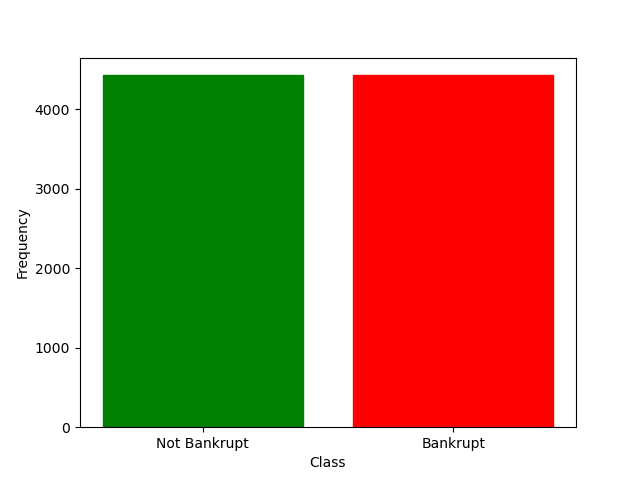

In [60]:
data=Y_train.value_counts().values
labels=["Not Bankrupt","Bankrupt"]
plt.figure()
plt.xticks(range(0,2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")
barlist=plt.bar(range(0,2),data,)
barlist[0].set_color("g")
barlist[1].set_color("r")
plt.show()

## Logistic Regression with Preprocessing and Upsampling

In [61]:
model=LogisticRegression(max_iter=10000,random_state=42)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=10000, random_state=42)

In [62]:
predict=model.predict(X_test)

In [63]:
#performance
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2170
           1       0.18      0.91      0.30        81

    accuracy                           0.85      2251
   macro avg       0.59      0.88      0.61      2251
weighted avg       0.97      0.85      0.89      2251



[[1836  334]
 [   7   74]]


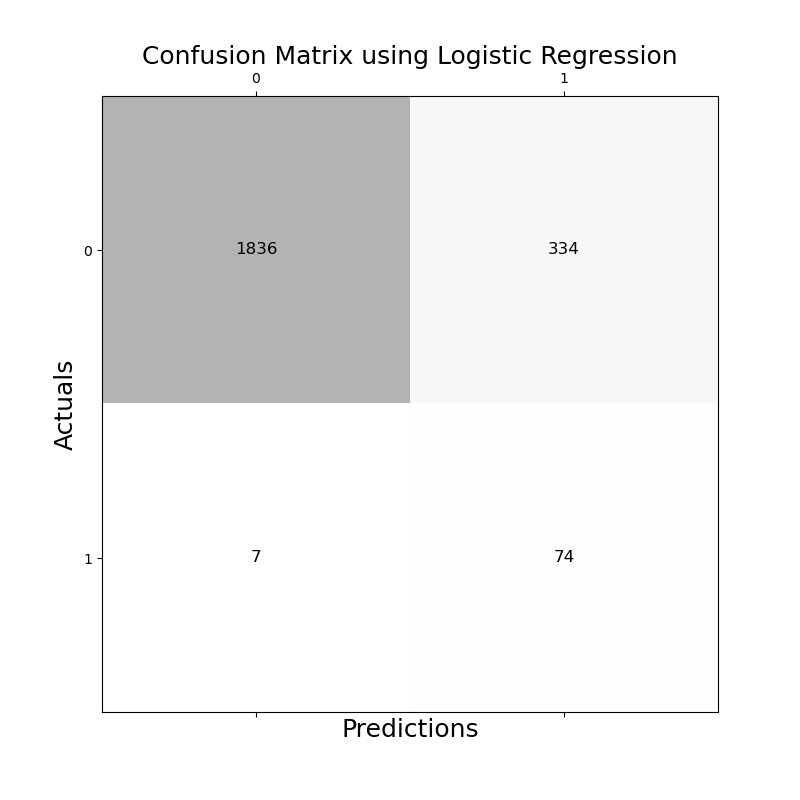

In [64]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# K-NN Classifier

## Imports

In [65]:
from sklearn.neighbors import KNeighborsClassifier

## Model Training (Euclidean Distance)

### Fitting

In [66]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

### Prediction

In [67]:
prediction=model.predict(X_test)


### Performance

In [68]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2170
           1       0.18      0.91      0.30        81

    accuracy                           0.85      2251
   macro avg       0.59      0.88      0.61      2251
weighted avg       0.97      0.85      0.89      2251



### visualization

[[1836  334]
 [   7   74]]


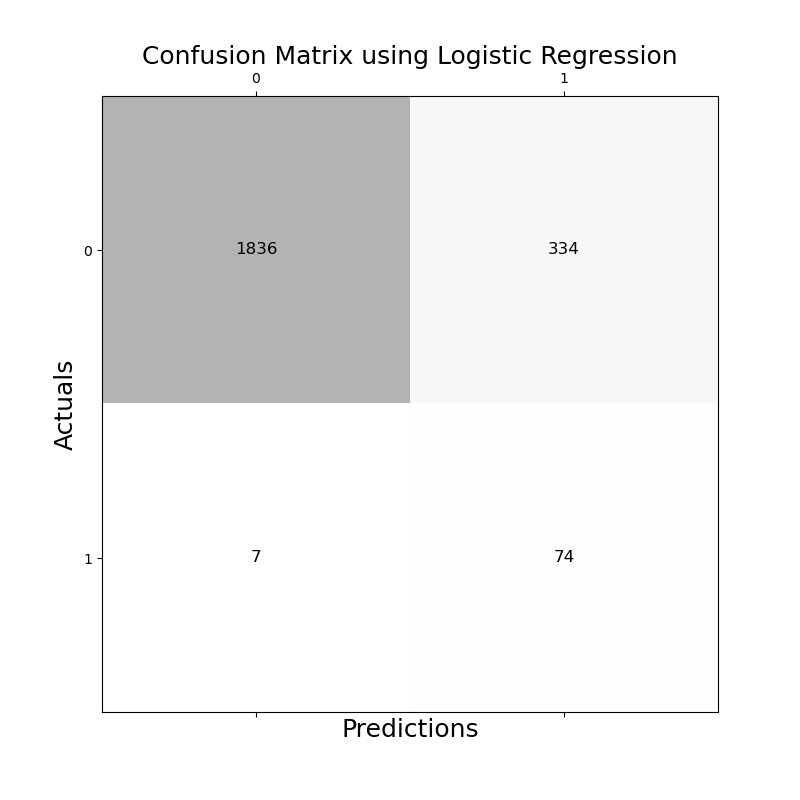

In [69]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# Support Vector Machines (Non-upscaled Data)

## Imports

In [70]:
from sklearn.svm import LinearSVC

## Train-Test-Split

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X_Best_Scaled,Y,test_size=0.33,random_state=42)
print(X_train.shape,X_test.shape)

(4568, 12) (2251, 12)


## Model Training

In [72]:
model=LinearSVC(max_iter=50000,random_state=42)
model.fit(X_train,Y_train)

LinearSVC(max_iter=50000, random_state=42)

## Prediction

In [73]:
prediction=model.predict(X_test)

## Performance

In [74]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      2170
           1       0.18      0.91      0.30        81

    accuracy                           0.85      2251
   macro avg       0.59      0.88      0.61      2251
weighted avg       0.97      0.85      0.89      2251



## visualization

[[1836  334]
 [   7   74]]


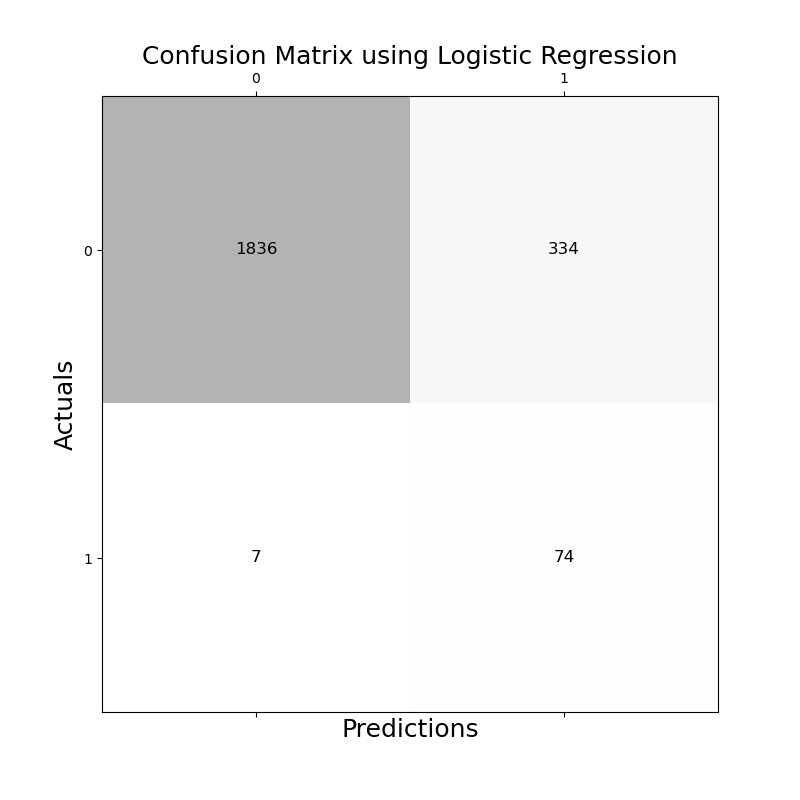

In [75]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# Neural Network

## Imports

In [82]:
from sklearn.neural_network import MLPClassifier

## Model Training

In [83]:
model=MLPClassifier(hidden_layer_sizes=(100,50),solver='lbfgs',alpha=1e-5,random_state=42,max_iter=10000)

#Training data 
Y_train=X_train_Upscaled["Bankrupt?"]
X_train=X_train_Upscaled.drop("Bankrupt?",axis=1)

model.fit(X_train,Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50), max_iter=10000,
              random_state=42, solver='lbfgs')

## Prediction

In [84]:
prediction=model.predict(X_test)

## Performance

In [85]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2170
           1       0.37      0.31      0.34        81

    accuracy                           0.96      2251
   macro avg       0.67      0.64      0.66      2251
weighted avg       0.95      0.96      0.95      2251



## Visualization

In [86]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

[[1815  355]
 [   6   75]]


# Ensemble Model #1

# Imports

In [94]:
from sklearn.ensemble import VotingClassifier

## Model Training

In [88]:
lr=LogisticRegression(max_iter=10000,random_state=78)
knn=KNeighborsClassifier(n_neighbors=10)
mlp=MLPClassifier(hidden_layer_sizes=(100,50),solver='lbfgs',alpha=1e-5,random_state=42,max_iter=10000)
#Training data 
Y_train=X_train_Upscaled["Bankrupt?"]
X_train=X_train_Upscaled.drop("Bankrupt?",axis=1)

In [89]:
voting=VotingClassifier(estimators=[('lr',lr),('mlp',mlp),('knn',knn)],voting='hard')
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=78)),
                             ('mlp',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(100, 50),
                                            max_iter=10000, random_state=42,
                                            solver='lbfgs')),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

## Predictions

In [90]:
predict=voting.predict(X_test)

## Performance

In [91]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2170
           1       0.28      0.67      0.40        81

    accuracy                           0.93      2251
   macro avg       0.63      0.80      0.68      2251
weighted avg       0.96      0.93      0.94      2251



## Visualization

[[2032  138]
 [  27   54]]


/home/basu/anaconda3/envs/sem_project/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


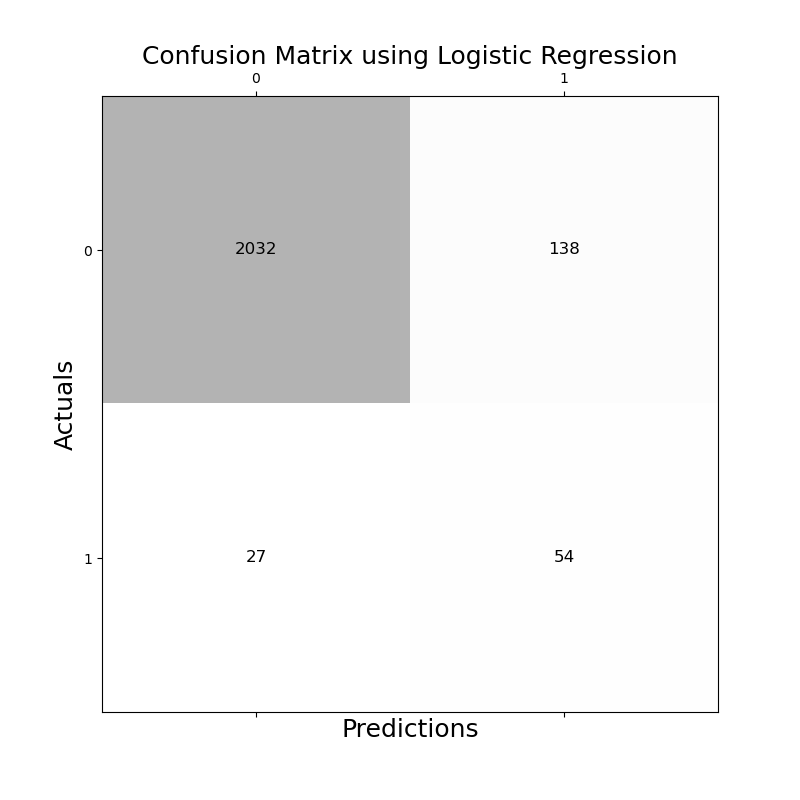

In [92]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# Ensemble Model #2

# Imports

In [93]:
from sklearn.ensemble import VotingClassifier

## Model Training

In [95]:
lr=LogisticRegression(max_iter=10000,random_state=78)
knn=KNeighborsClassifier(n_neighbors=10)
mlp=MLPClassifier(hidden_layer_sizes=(100,50),solver='lbfgs',alpha=1e-5,random_state=42,max_iter=10000)
#Training data 
Y_train=X_train_Upscaled["Bankrupt?"]
X_train=X_train_Upscaled.drop("Bankrupt?",axis=1)

In [97]:
voting=VotingClassifier(estimators=[('lr',lr),('mlp',mlp),('knn',knn)],voting='soft',weights=(0.3,0.4,0.3))
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 random_state=78)),
                             ('mlp',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(100, 50),
                                            max_iter=10000, random_state=42,
                                            solver='lbfgs')),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=(0.3, 0.4, 0.3))

## Predictions

In [98]:
predict=voting.predict(X_test)

## Performance

In [99]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2170
           1       0.38      0.62      0.47        81

    accuracy                           0.95      2251
   macro avg       0.68      0.79      0.72      2251
weighted avg       0.96      0.95      0.96      2251



## Visualization

[[2087   83]
 [  31   50]]


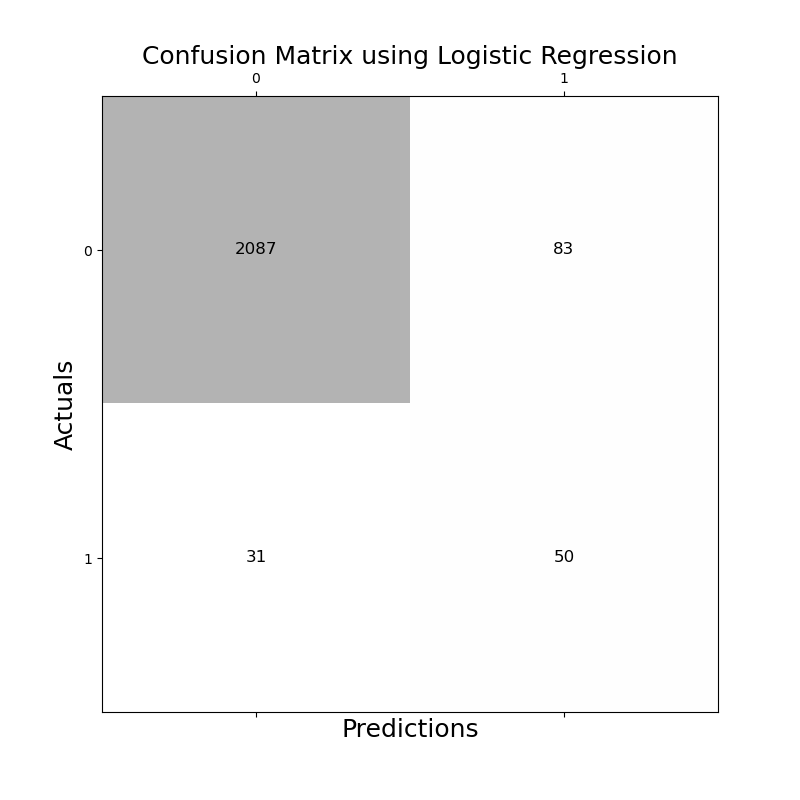

In [100]:
conf_matrix=confusion_matrix(Y_test,predict)
print(conf_matrix)

#Visualization
fig,ax=plt.subplots(figsize=(8,8))
ax.matshow(conf_matrix,cmap=plt.cm.Greys,alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j,y=i,s=conf_matrix[i,j],va='center',ha='center',size='large')
plt.title("Confusion Matrix using Logistic Regression",fontsize=18)
plt.xlabel("Predictions",fontsize=18)
plt.ylabel("Actuals",fontsize=18);

# Conclusion

The Best model is the Ensemble method that uses soft voting mechanism for classification based on the F1 score metric of bankrupt companies. Being able to predict the bankruptcy of a company could have several impacts, this could help the company itself to be more careful when making decisions as they may be going the wrong way and could lead to bankruptcy. Hedge funds might also be interested in such companies as they can short the stocks of such companies to make a profit.

Finally, for future estimations we should advance in terms of the possible models used to build the ensemble. Also increasing the number of features might be helpful.